# Effective Pandas
Starting from Chapter 16, and progressing until the notebook length becomes challenging.  Likely 200-300 lines of code across a number of cell.  Initiate notebook with data sets being leveraged in prior notebooks to facilitate continuation.

- Car data notebook with mpg data
- World cup history datasource
- Snow resort precipitation records

### Imports
Minimum imports to follow allong are pandas and numpy.  Potential to add matplotlib at a later point.  Unclear if this is needed at this time.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Bad value in file WindowsPath('C:/Users/KNHOFFM/.matplotlib/stylelib/xom.mplstyle'), line 11 ('lines.color: #0C479D'): Key lines.color: '' does not look like a color arg
Bad value in file WindowsPath('C:/Users/KNHOFFM/.matplotlib/stylelib/xom.mplstyle'), line 15 ('patch.edgecolor: #FFFFFF'): Key patch.edgecolor: '' does not look like a color arg
Bad value in file WindowsPath('C:/Users/KNHOFFM/.matplotlib/stylelib/xom.mplstyle'), line 16 ('patch.facecolor: #0C479D'): Key patch.facecolor: '' does not look like a color arg


### Datasets

In [2]:
cars = pd.read_csv("vehicles.csv")

c:\users\knhoffm\.virtualenvs\python_for_engineer_science\lib\site-packages\IPython\core\interactiveshell.py:3378: DtypeWarning: Columns (70,71,72,73,74,76,79) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
fifa = pd.read_csv("international_matches.csv")

In [4]:
alta_df = pd.read_csv('alta-noaa-1980-2019.csv')

## Ch 16 Dataframes
In pandas, the two dimensional counterpart to the one dimensional Series is the Dataframe.  To understand this data structure, it helps to understand how it is constructed.  

### DB and Spreadsheets
If one thinks of a dataframe as row oriented, it will hamper progress.  While this is a common refrain, it is derived from the use of CSV files and Databases which start from a row oriented structure.  A dataframe, which is commonly used for analytical purposes, is better understood as column oriented.  In this case, each column of the dataframe is a Series.  

The improvement in performance associated with a column based system is derived from the fact that it does not require all of the data to be loaded to interogate a single field, and in fact, just the field can be loaded.  In a row based system, all of the records must be loaded into memory to get the information in a single column.  

### Simply python dataframe equivalent
Below, and simple python equivalent of a column oriented structure will be created to drive home the structure and the process through which data is accessed effectively in such a structure.

In [5]:
df = {
    'index':[0,1,2],
    'cols':[
        {'name':'growth',
         'data':[0.5, 0.7, 1.2]},
        {'name':'Name',
         'data':['Paul', 'George', 'Ringo']},
    ]
}

In [6]:
df

{'index': [0, 1, 2],
 'cols': [{'name': 'growth', 'data': [0.5, 0.7, 1.2]},
  {'name': 'Name', 'data': ['Paul', 'George', 'Ringo']}]}

> Note: functions need to be developed to access the information to allow repeatability

In [7]:
def get_row(df,idx):
    """Access a row of data from a passed df"""
    results=[]
    value_idx = df['index'].index(idx)
    for col in df['cols']:
        results.append(col['data'][value_idx])
    return results
    

In [8]:
get_row(df,1)

[0.7, 'George']

In [9]:
def get_col(df,name):
    for col in df['cols']:
        if col['name']==name:
            return col['data']

In [10]:
get_col(df, 'Name')

['Paul', 'George', 'Ringo']

In [11]:
get_col(df, 'growth')

[0.5, 0.7, 1.2]

### Dataframe using pandas
The pandas equivalent of the pure python above is based off of the same columer structure, and implementing it has a similar feel.  However, you needed worry about creating methods to access, and many of the Series processes also work quite well on df structures.

In [12]:
df = pd.DataFrame(
{'growth':[0.5, 0.7, 1.2],
'Name':['Paul','George','Ringo']})

In [13]:
df

growth    Name
0     0.5    Paul
1     0.7  George
2     1.2   Ringo

Notice an index has automatically been added, and uses a non repeating sequential interger system.  This is the default, and there are options to set the index.  That said, there are hundreds of attributes and methods to a dataframe to allow access and manipulation of data.  Main features will be visited herein:

In [14]:
# row access
df.iloc[2]

growth      1.2
Name      Ringo
Name: 2, dtype: object

In [15]:
# column access
df["Name"]

0      Paul
1    George
2     Ringo
Name: Name, dtype: object

In [16]:
# note the dtype of a df column is a Series, and they have all the attributes already covered
type(df.Name)

pandas.core.series.Series

> **NOTE:**The above attibute call into a dataframe works as long as their are no spaces or there is no conflict with a different method or attribute as this will overload the call.

### Constructing a dataframe
Dataframes can be created a number of ways.  Some inputs are:
- columns(dicts of lists)
- rows (lists of dicts)
- CSV files (pd.read_csv)
- Numpy ndarrays
- other: SQL, HDF5, arrows, etc

In [17]:
# row based dataframe creation
pd.DataFrame([{'growth':0.5, 'Name':'Paul'},
              {'growth':0.7, 'Name':'George'},
              {'growth':1.0, 'Name':'Ringo'},])

growth    Name
0     0.5    Paul
1     0.7  George
2     1.0   Ringo

In [18]:
# numpy created dataframe
np.random.seed(42)
pd.DataFrame(np.random.randn(10,3), columns=list('abc'))

a         b         c
0  0.496714 -0.138264  0.647689
1  1.523030 -0.234153 -0.234137
2  1.579213  0.767435 -0.469474
3  0.542560 -0.463418 -0.465730
4  0.241962 -1.913280 -1.724918
5 -0.562288 -1.012831  0.314247
6 -0.908024 -1.412304  1.465649
7 -0.225776  0.067528 -1.424748
8 -0.544383  0.110923 -1.150994
9  0.375698 -0.600639 -0.291694

### Dataframe axes
Unlike a Series, and Dataframe has two axes.  They are commonly referred to as axis 0 and 1 for the index(rows) and fields(columns) respectively:
- axis=0, row based index access through index attribute
- axis=1, column based index access through columns attribute

In [19]:
df.axes

[RangeIndex(start=0, stop=3, step=1),
 Index(['growth', 'Name'], dtype='object')]

In [20]:
# you can use aggregation functions along an axis, aggregate values along columns or for fields
df.sum(axis=0)

growth                2.4
Name      PaulGeorgeRingo
dtype: object

In [21]:
# again, other axis, across columns or for a single record/row
df.sum(axis=1, numeric_only=True)

0    0.5
1    0.7
2    1.2
dtype: float64

In [22]:
# spelling out the axis is best for readability
df.sum(axis='index')

growth                2.4
Name      PaulGeorgeRingo
dtype: object

In [23]:
df.sum(axis='columns', numeric_only=True)

0    0.5
1    0.7
2    1.2
dtype: float64

> **Note**: Many operations take and ax parameter to indicate which access, remember the ax[0] in the index and ax[1] is the columns

In [24]:
df.axes[0]

RangeIndex(start=0, stop=3, step=1)

In [25]:
df.axes[1]

Index(['growth', 'Name'], dtype='object')

In [26]:
df1 = pd.DataFrame({'Score1':[None, None],
                    'Score2':[85,90]})
df1

Score1  Score2
0   None      85
1   None      90

In [27]:
df1.apply(np.sum, axis=0) # down columns by row (row1, row2, etc)

Score1      0
Score2    175
dtype: int64

In [28]:
df1.apply(np.sum, axis=1) # across rows by column (col1, col2, etc)

0    85
1    90
dtype: int64

### Pset
1. Create a dataframe with the name, ages(est), and title of people you know, group or 3 or 4
2. Capitalize their Names
3. Aggregate their ages

In [29]:
peeps = pd.DataFrame({'Name':['Keith','Katherine','Grady','Reece','Abel'],
                      'Age':[43,42,15,13,5],
                      'Relationship':['Self','Wife','Son','Son','Son'],
                      'Height_in':[68,62,71,59,46]})
peeps

Name  Age Relationship  Height_in
0      Keith   43         Self         68
1  Katherine   42         Wife         62
2      Grady   15          Son         71
3      Reece   13          Son         59
4       Abel    5          Son         46

In [30]:
(peeps
 .assign(Name = lambda df: df.Name.str.upper(),
        Height_cm = lambda df: df.Height_in*2.54)
)

Name  Age Relationship  Height_in  Height_cm
0      KEITH   43         Self         68     172.72
1  KATHERINE   42         Wife         62     157.48
2      GRADY   15          Son         71     180.34
3      REECE   13          Son         59     149.86
4       ABEL    5          Son         46     116.84

In [31]:
(peeps
 .sum(axis=0, numeric_only=True)
)

Age          118
Height_in    306
dtype: int64

In [32]:
(peeps
 .describe(include=int)
)

Age  Height_in
count   5.000000   5.000000
mean   23.600000  61.200000
std    17.657859   9.731393
min     5.000000  46.000000
25%    13.000000  59.000000
50%    15.000000  62.000000
75%    42.000000  68.000000
max    43.000000  71.000000

## Chapter 17 - Similarities btw DF and Series
How does a Series and a Dataframe compare?  Very well in reality since a dataframe simple a group of series which are matched along their index, specifically axis 0.  To walk through a solid comparison of the two structures will take a number of chapters and the use of a new dataset.  

In [120]:
pres = pd.read_csv('siena2018-pres.csv', index_col=0)
pres

Seq.               President                  Party  Bg  Im  Int  IQ   L  \
1       1       George Washington            Independent   7   7    1  10   1   
2       2              John Adams             Federalist   3  13    4   4  24   
3       3        Thomas Jefferson  Democratic-Republican   2   2   14   1   8   
4       4           James Madison  Democratic-Republican   4   6    7   3  16   
5       5            James Monroe  Democratic-Republican   9  14   11  18   6   
6       6       John Quincy Adams  Democratic-Republican   1   9    6   5  29   
7       7          Andrew Jackson             Democratic  37  15   29  28   4   
8       8        Martin Van Buren             Democratic  23  22   27  25  34   
9       9  William Henry Harrison                   Whig  22  38   28  37  44   
10     10              John Tyler            Independent  34  33   35  34  22   
11     11           James K. Polk             Democratic  19  10   23  23   9   
12     12          Zachary Taylor                   Whig  30  26   22  32  37   
13     13        Millard Fillmore                   Whig  40  37   36  38  35   
14     14         Franklin Pierce             Democratic  38  39   38  40  39   
15     15          James Buchanan             Democratic  36  43   40  39  42   
16     16         Abraham Lincoln             Republican  28   1    2   2  18   
17     17          Andrew Johnson             Democratic  42  42   41  42  40   
18     18        Ulysses S. Grant             Republican  20  24   25  24  26   
19     19     Rutherford B. Hayes             Republican  35  30   32  29  23   
20     20       James A. Garfield             Republican  22  25   21  20  41   
21     21       Chester A. Arthur             Republican  41  31   37  36  17   
22  22/24        Grover Cleveland             Democratic  26  23   26  27  19   
23     23       Benjamin Harrison             Republican  33  34   30  35  28   
24     25        William McKinley             Republican  29  20   20  26  32   
25     26      Theodore Roosevelt             Republican   5   4    8   6   2   
26     27     William Howard Taft             Republican  12  28   12  14  27   
27     28          Woodrow Wilson             Democratic   8   8   19   7  14   
28     29       Warren G. Harding             Republican  39  41   42  43  33   
29     30         Calvin Coolidge             Republican  32  36   17  33  13   
30     31          Herbert Hoover             Republican  13  35   15  13  43   
31     32   Franklin D. Roosevelt             Democratic   6   3   16  12   5   
32     33         Harry S. Truman             Democratic  31  16    9  21  12   
33     34    Dwight D. Eisenhower             Republican  11  18    5  17   7   
34     35         John F. Kennedy             Democratic  14   5   31  11  31   
35     36       Lyndon B. Johnson             Democratic  15  11   34  22  25   
36     37           Richard Nixon             Republican  16  21   43  16  36   
37     38             Gerald Ford             Republican  18  32   10  30  30   
38     39            Jimmy Carter             Democratic  25  19    3  15  38   
39     40           Ronald Reagan             Republican  27  17   24  31   3   
40     41       George H. W. Bush             Republican  10  27   18  19  20   
41     42            Bill Clinton             Democratic  21  12   39   8  11   
42     43          George W. Bush             Republican  17  29   33  41  21   
43     44            Barack Obama             Democratic  24  11   13   9  15   
44     45            Donald Trump             Republican  43  40   44  44  10   

    WR  AC  ...  PL  RC  CAp  HE  EAp  DA  FPA  AM  EV   O  
1    6   2  ...  18   1    1   1    1   2    2   1   2   1  
2   14  31  ...  28  17    4  13   15  19   13  16  10  14  
3    5  14  ...   5   5    7  20    4   6    9   7   5   5  
4   15   6  ...   9  10    6  14    7  11   19  11   8   7  
5   16   7  ...  12   8   11   9    9  10    5   6   9

In [34]:
pres.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44 entries, 1 to 44
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Seq.       44 non-null     object
 1   President  44 non-null     object
 2   Party      44 non-null     object
 3   Bg         44 non-null     int64 
 4   Im         44 non-null     int64 
 5   Int        44 non-null     int64 
 6   IQ         44 non-null     int64 
 7   L          44 non-null     int64 
 8   WR         44 non-null     int64 
 9   AC         44 non-null     int64 
 10  EAb        44 non-null     int64 
 11  LA         44 non-null     int64 
 12  CAb        44 non-null     int64 
 13  OA         44 non-null     int64 
 14  PL         44 non-null     int64 
 15  RC         44 non-null     int64 
 16  CAp        44 non-null     int64 
 17  HE         44 non-null     int64 
 18  EAp        44 non-null     int64 
 19  DA         44 non-null     int64 
 20  FPA        44 non-null     int64 


### Function to tweak
In normal Effective pandas style, the entire dataframe will be tweaked with a large functional call and chaining operations all around.  This is a heavy format for new users, but the general concepts are critical to better pandas usage and more efficient recreation of datastates.

In [35]:
def tweak_siena(df):
    """Convert Siena presidential Dataframe into a more usable format with appropriate dtypes"""
    def int64_to_uint8(df_):
        """convert int columns to uint8 dtype for space/memory"""
        cols = df_.select_dtypes('int64')
        return (df_
                .astype({col:'uint8' for col in cols})
               )
    return (df
            .rename(columns={'Seq.':'Seq'}) #1 column name update
            .rename(columns={k:v.replace(' ','_') for k,v in
                {'Bg':'Background',
                 'PL':'Party Leadership','CAb':'Communication ability',
                 'RC':'Relations with Congress','CAp':'Court appointments',
                 'HE':'Handling of economy','L':'Luck',
                 'AC':'Ability to compromise','WR':'Willing to take risks',
                 'EAp':'Executive appointments','OA':'Overall Ability',
                 'Im':'Imagination','DA':'Domestic accomplishments',
                 'Int':'Integrity','EAb':'Executive ability',
                 'FPA':'Foriegn policy accomplishments',
                 'LA':'Leadership ability',
                 'IQ':'Intelligence','AM':'Avoid crucial mistakes',
                 'EV':'Experts view','O':'Overall'}.items()})
            .astype({'Party':'category'}) #2 category convert
            .pipe(int64_to_uint8) #3 dtypes
            .assign(Average_rank=lambda df_:(df_.select_dtypes('uint8') #4 create new columns
                            .sum(axis=1).rank(method='dense').astype('uint8')),
                   Quartile=lambda df_:pd.qcut(df_.Average_rank, 4,
                        labels='Ist 2nd 3rd 4th'.split())
                   )
           )

In [36]:
import seaborn as sns

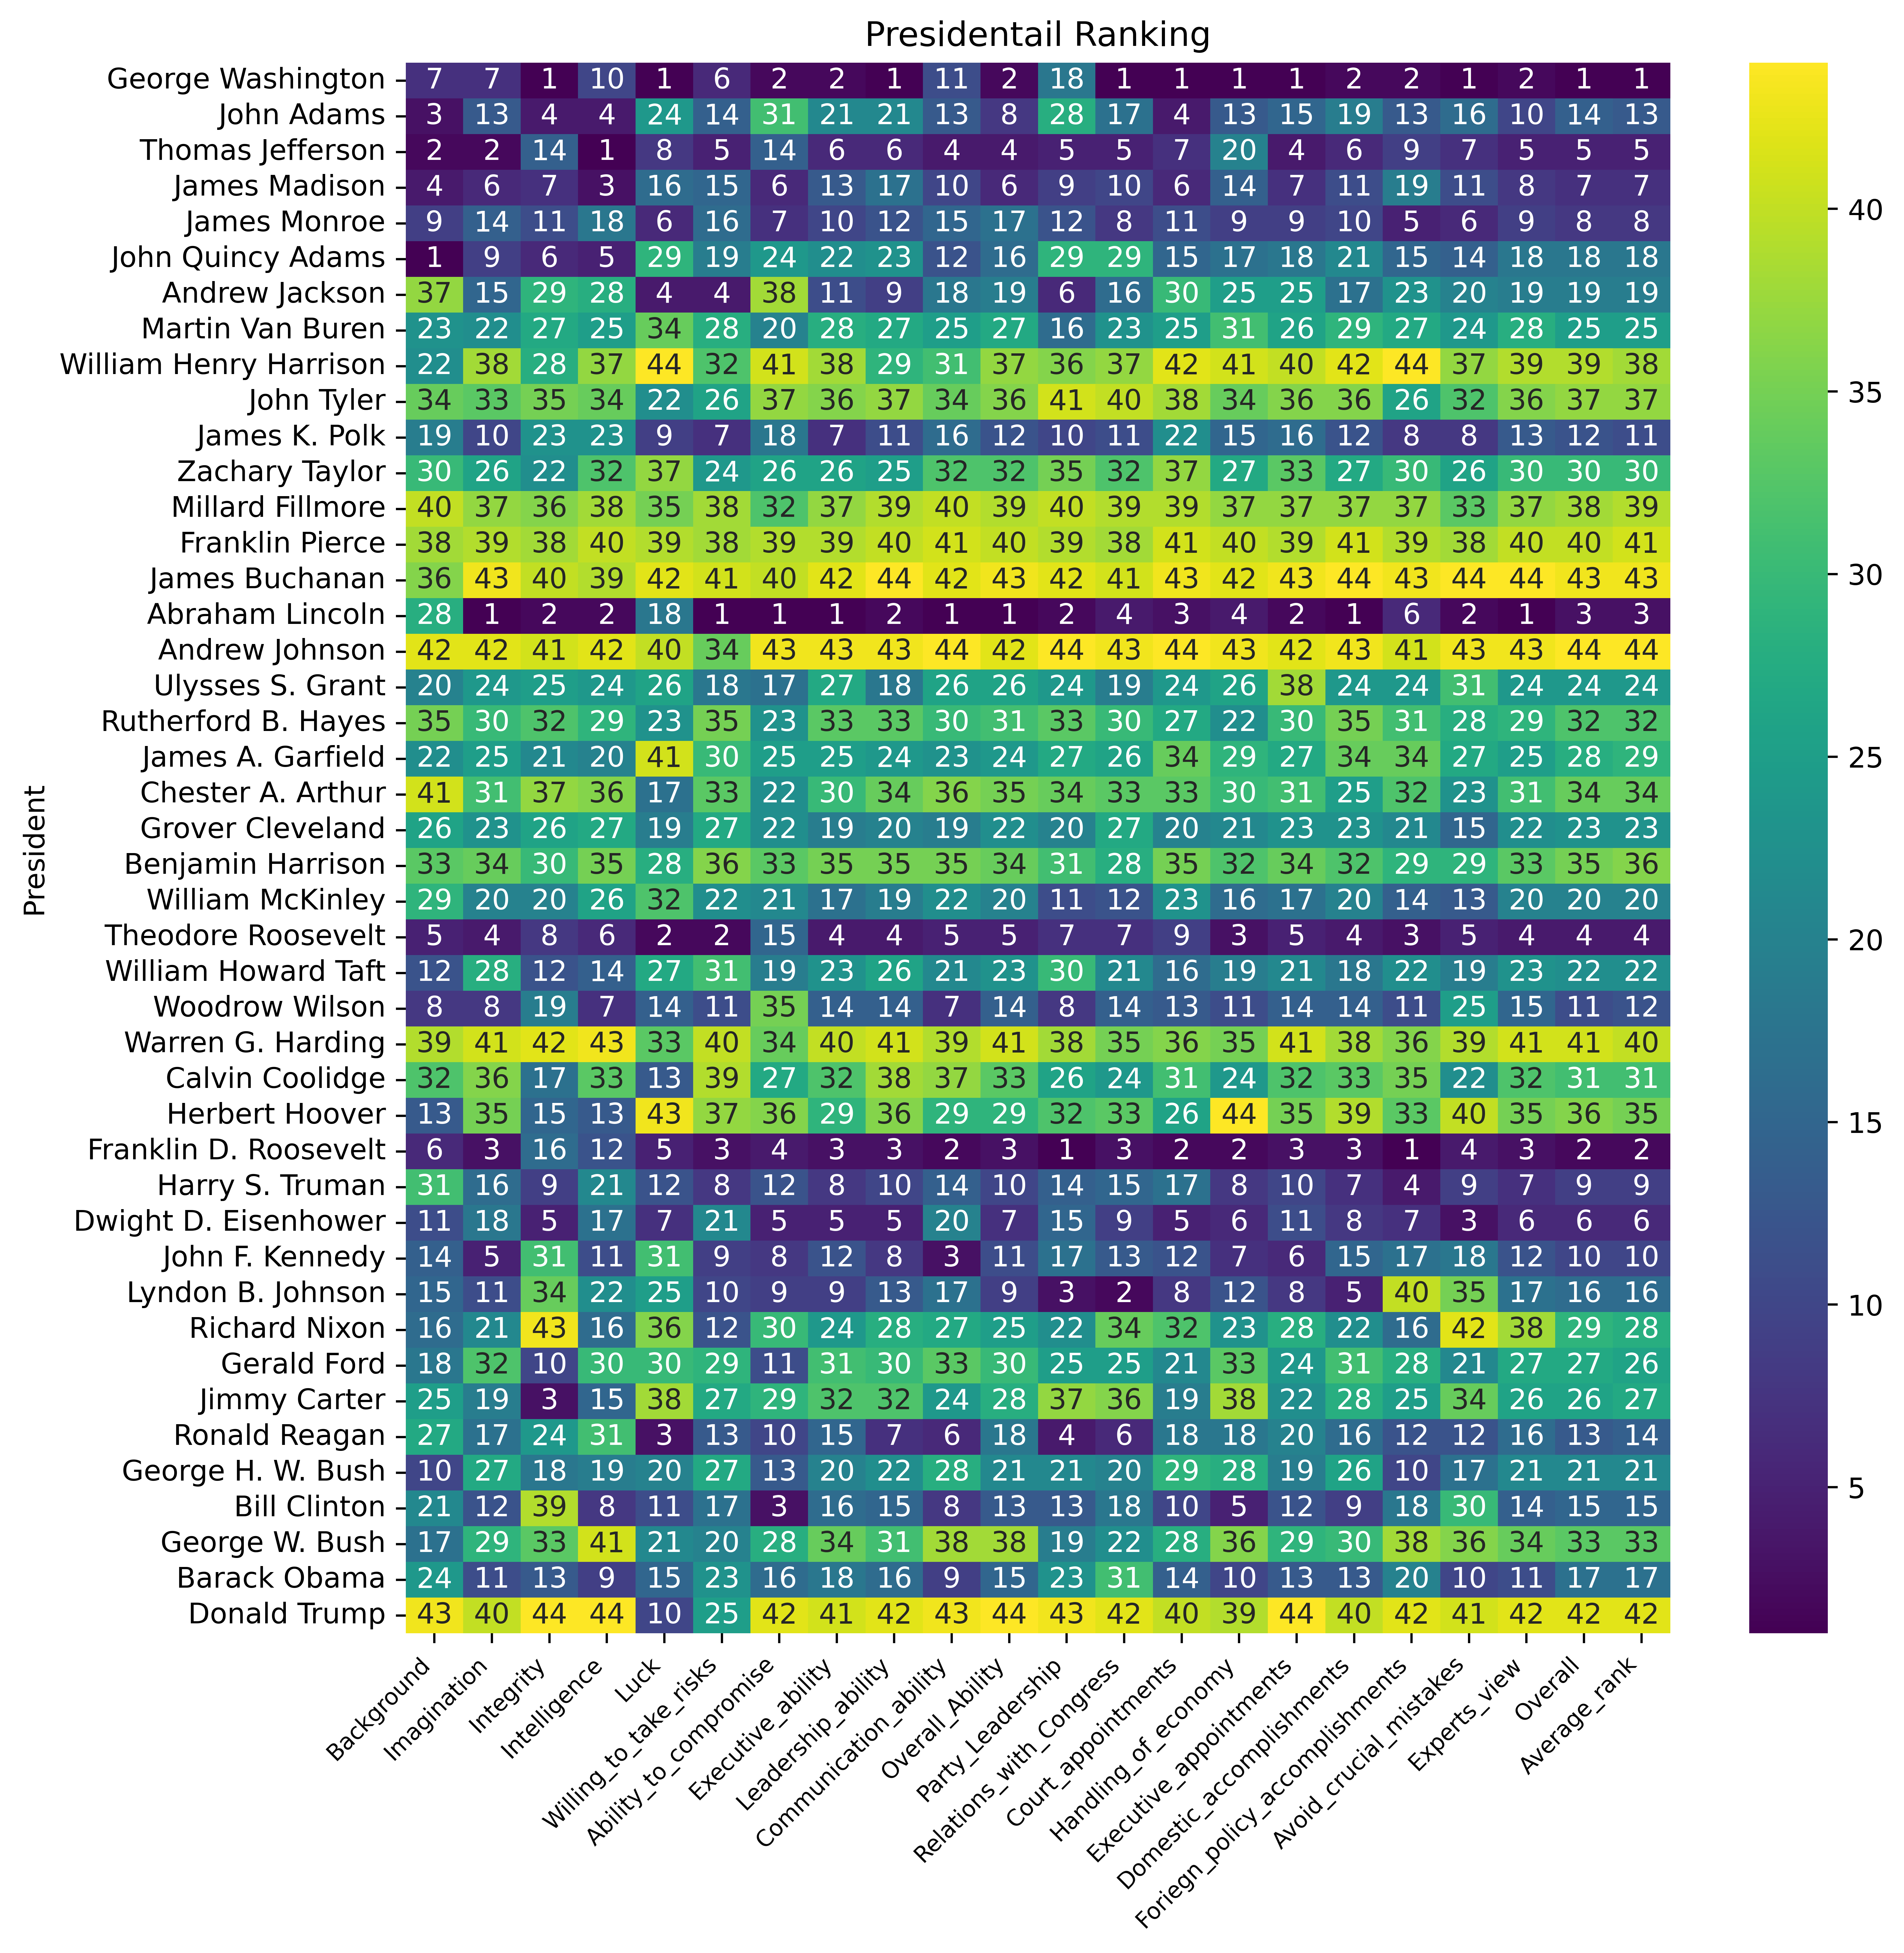

In [37]:
fig, ax = plt.subplots(figsize=(10,10), dpi=680)
g = sns.heatmap((tweak_siena(pres)
                 .set_index('President')
                 .iloc[:,2:-1]
                ), annot=True, cmap='viridis', ax=ax)
g.set_xticklabels(g.get_xticklabels(), rotation=45, fontsize=8, ha='right')
_ = plt.title("Presidentail Ranking")
fig.savefig('20-pres.png', bbox_inches='tight')

### Viewing Data
Of course, you can view the data directly, by accessing through the same techniques used throughout the Series study of information.

In [38]:
pres = tweak_siena(pres)

In [39]:
pres.head(3)

Seq          President                  Party  Background  Imagination  \
1   1  George Washington            Independent           7            7   
2   2         John Adams             Federalist           3           13   
3   3   Thomas Jefferson  Democratic-Republican           2            2   

   Integrity  Intelligence  Luck  Willing_to_take_risks  \
1          1            10     1                      6   
2          4             4    24                     14   
3         14             1     8                      5   

   Ability_to_compromise  ...  Court_appointments  Handling_of_economy  \
1                      2  ...                   1                    1   
2                     31  ...                   4                   13   
3                     14  ...                   7                   20   

   Executive_appointments  Domestic_accomplishments  \
1                       1                         2   
2                      15                        19   
3                       4                         6   

   Foriegn_policy_accomplishments  Avoid_crucial_mistakes  Experts_view  \
1                               2                       1             2   
2                              13                      16            10   
3                               9                       7             5   

   Overall  Average_rank  Quartile  
1        1             1       Ist  
2       14            13       2nd  
3        5             5       Ist  

[3 rows x 26 columns]

In [40]:
pres.sample(3)

Seq         President                  Party  Background  Imagination  \
30  31    Herbert Hoover             Republican          13           35   
44  45      Donald Trump             Republican          43           40   
3    3  Thomas Jefferson  Democratic-Republican           2            2   

    Integrity  Intelligence  Luck  Willing_to_take_risks  \
30         15            13    43                     37   
44         44            44    10                     25   
3          14             1     8                      5   

    Ability_to_compromise  ...  Court_appointments  Handling_of_economy  \
30                     36  ...                  26                   44   
44                     42  ...                  40                   39   
3                      14  ...                   7                   20   

    Executive_appointments  Domestic_accomplishments  \
30                      35                        39   
44                      44                        40   
3                        4                         6   

    Foriegn_policy_accomplishments  Avoid_crucial_mistakes  Experts_view  \
30                              33                      40            35   
44                              42                      41            42   
3                                9                       7             5   

    Overall  Average_rank  Quartile  
30       36            35       4th  
44       42            42       4th  
3         5             5       Ist  

[3 rows x 26 columns]

### Pset
1. Create a dataframe
2. View the first 20 rows
3. Sample 30 rows

In [41]:
fifa.head(20)

date      home_team     away_team home_team_continent  \
0   1993-08-08        Bolivia       Uruguay       South America   
1   1993-08-08         Brazil        Mexico       South America   
2   1993-08-08        Ecuador     Venezuela       South America   
3   1993-08-08         Guinea  Sierra Leone              Africa   
4   1993-08-08       Paraguay     Argentina       South America   
5   1993-08-08           Peru      Colombia       South America   
6   1993-08-08       Zimbabwe      Eswatini              Africa   
7   1993-08-09         Guinea  Sierra Leone              Africa   
8   1993-08-11  Faroe Islands        Norway              Europe   
9   1993-08-11         Sweden   Switzerland              Europe   
10  1993-08-15      Australia        Canada             Oceania   
11  1993-08-15        Bolivia       Ecuador       South America   
12  1993-08-15       Colombia     Argentina       South America   
13  1993-08-15          Congo        Guinea              Africa   
14  1993-08-15        Uruguay        Brazil       South America   
15  1993-08-22      Argentina          Peru       South America   
16  1993-08-22        Bolivia     Venezuela       South America   
17  1993-08-22         Brazil       Ecuador       South America   
18  1993-08-22       Paraguay      Colombia       South America   
19  1993-08-22         Sweden        France              Europe   

   away_team_continent  home_team_fifa_rank  away_team_fifa_rank  \
0        South America                   59                   22   
1        North America                    8                   14   
2        South America                   35                   94   
3               Africa                   65                   86   
4        South America                   67                    5   
5        South America                   70                   19   
6               Africa                   50                  102   
7               Africa                   65                   86   
8               Europe                  111                    9   
9               Europe                    4                    3   
10       North America                   52                   46   
11       South America                   59                   35   
12       South America                   19                    5   
13              Africa                  107                   65   
14       South America                   22                    8   
15       South America                    5                   70   
16       South America                   59                   94   
17       South America                    8                   35   
18       South America                   67                   19   
19              Europe                    4                   12   

    home_team_total_fifa_points  away_team_total_fifa_points  home_team_score  \
0                             0                            0                3   
1                             0                            0                1   
2                             0                            0                5   
3                             0                            0                1   
4                             0                            0                1   
5                             0                            0                0   
6                             0                            0                2   
7                             0                            0                4   
8                             0                            0                0   
9                             0                            0                1   
10                            0                            0                2   
11                            0                            0                1   
12                            0                            0                2   
13                            0        

In [42]:
fifa.sample(30)

date            home_team              away_team  \
8628   2005-01-03             Malaysia              Indonesia   
2290   1997-04-30               Greece                Croatia   
10607  2007-07-28               Angola                Lesotho   
5705   2001-07-01              Liberia                  Ghana   
17273  2014-11-15      North Macedonia               Slovakia   
22407  2021-03-29              Ecuador                Bolivia   
9254   2005-10-12              Ukraine                  Japan   
20495  2018-09-07              Albania                 Israel   
13815  2011-02-09              Senegal                 Guinea   
23379  2022-01-16                 Peru                 Panama   
7003   2003-04-30  Republic of Ireland                 Norway   
1680   1996-08-24           Seychelles              Mauritius   
10193  2007-02-06     Northern Ireland                  Wales   
18476  2016-03-29            Argentina                Bolivia   
9728   2006-07-15                Syria                   Iraq   
18064  2015-10-11             Ethiopia  São Tomé and Príncipe   
10206  2007-02-07              Georgia                 Turkey   
649    1994-12-14          Netherlands             Luxembourg   
18201  2015-11-13                Kenya             Cabo Verde   
3707   1999-06-05               France                 Russia   
6427   2002-07-12            Australia                 Tahiti   
12385  2009-06-06                Gabon                   Togo   
4771   2000-07-18              Uruguay              Venezuela   
16533  2013-11-19      Kyrgyz Republic             Azerbaijan   
6448   2002-07-30                Sudan               Ethiopia   
13592  2010-11-17              Finland             San Marino   
4667   2000-06-18               Angola                 Zambia   
22168  2020-11-11               Greece                 Cyprus   
10840  2007-10-14              Senegal                 Guinea   
15212  2012-08-15              Ukraine         Czech Republic   

      home_team_continent away_team_continent  home_team_fifa_rank  \
8628                 Asia                Asia                  120   
2290               Europe              Europe                   29   
10607              Africa              Africa                   55   
5705               Africa              Africa                   68   
17273              Europe              Europe                   99   
22407       South America       South America                   57   
9254               Europe                Asia                   39   
20495              Europe              Europe                   58   
13815              Africa              Africa                   69   
23379       South America       North America                   22   
7003               Europe              Europe                   15   
1680               Africa              Africa                  178   
10193              Europe              Europe                   47   
18476       South America       South America                    2   
9728                 Asia                Asia                  110   
18064              Africa              Africa                  108   
10206              Europe              Europe                   95   
649                Europe              Europe                    6   
18201              Africa              Africa                  125   
3707               Europe              Europe                    2   
6427              Oceania             Oceania                   50   
12385              Africa              Africa                   48   
4771        South America       South America                   35   
16533                Asia              Europe                  150   
6448               Africa              Africa                  122   
13592              Europe              Europe                   87   
4667               Africa              Africa                   47   
22168              Europe            

# Chapter 18: Math methods in Dataframes
As seen previously, there are a number of mathmatical mathods using vectorized operations available on Seriese.  All of these are also available for DataFrames, with the added advantage of being able to combine and evaluate across different fields in the Dataframe to create new fields.

### Index Alignment
The indexes are forced to align to conduct math operations like .add() and .div().  These options require the DataFrame to find a common index to progress the math. It can lead to interesting results if the process is not honored in the evaluation process.

In [43]:
# clean data
pres

Seq               President                  Party  Background  \
1       1       George Washington            Independent           7   
2       2              John Adams             Federalist           3   
3       3        Thomas Jefferson  Democratic-Republican           2   
4       4           James Madison  Democratic-Republican           4   
5       5            James Monroe  Democratic-Republican           9   
6       6       John Quincy Adams  Democratic-Republican           1   
7       7          Andrew Jackson             Democratic          37   
8       8        Martin Van Buren             Democratic          23   
9       9  William Henry Harrison                   Whig          22   
10     10              John Tyler            Independent          34   
11     11           James K. Polk             Democratic          19   
12     12          Zachary Taylor                   Whig          30   
13     13        Millard Fillmore                   Whig          40   
14     14         Franklin Pierce             Democratic          38   
15     15          James Buchanan             Democratic          36   
16     16         Abraham Lincoln             Republican          28   
17     17          Andrew Johnson             Democratic          42   
18     18        Ulysses S. Grant             Republican          20   
19     19     Rutherford B. Hayes             Republican          35   
20     20       James A. Garfield             Republican          22   
21     21       Chester A. Arthur             Republican          41   
22  22/24        Grover Cleveland             Democratic          26   
23     23       Benjamin Harrison             Republican          33   
24     25        William McKinley             Republican          29   
25     26      Theodore Roosevelt             Republican           5   
26     27     William Howard Taft             Republican          12   
27     28          Woodrow Wilson             Democratic           8   
28     29       Warren G. Harding             Republican          39   
29     30         Calvin Coolidge             Republican          32   
30     31          Herbert Hoover             Republican          13   
31     32   Franklin D. Roosevelt             Democratic           6   
32     33         Harry S. Truman             Democratic          31   
33     34    Dwight D. Eisenhower             Republican          11   
34     35         John F. Kennedy             Democratic          14   
35     36       Lyndon B. Johnson             Democratic          15   
36     37           Richard Nixon             Republican          16   
37     38             Gerald Ford             Republican          18   
38     39            Jimmy Carter             Democratic          25   
39     40           Ronald Reagan             Republican          27   
40     41       George H. W. Bush             Republican          10   
41     42            Bill Clinton             Democratic          21   
42     43          George W. Bush             Republican          17   
43     44            Barack Obama             Democratic          24   
44     45            Donald Trump             Republican          43   

    Imagination  Integrity  Intelligence  Luck  Willing_to_take_risks  \
1             7          1            10     1                      6   
2            13          4             4    24                     14   
3             2         14             1     8                      5   
4             6          7             3    16                     15   
5            14         11            18     6                     16   
6             9          6             5    29                     19   
7            15         29            28     4                      4   
8            22         27            25    34                     28   
9            38         28            37    44                     32   
10           33         35         

In [44]:
# numeric only data
scores = (pres
          .loc[:, 'Background':'Average_rank']
         )

In [45]:
# intentionally misaligned score sets
s1 = scores.iloc[:3,:4]
s2 = scores.iloc[1:6, :5]

In [46]:
# only overlapped records are returned, everythin else is Nan
s1 + s2

Background  Imagination  Integrity  Intelligence  Luck
1         NaN          NaN        NaN           NaN   NaN
2         6.0         26.0        8.0           8.0   NaN
3         4.0          4.0       28.0           2.0   NaN
4         NaN          NaN        NaN           NaN   NaN
5         NaN          NaN        NaN           NaN   NaN
6         NaN          NaN        NaN           NaN   NaN

### Duplicate index values
If there are duplicated values in the index, each index value in the left dataframe will align with index values in the right dataframe.  This means it will create duplicate records.  Most frequently this might happen with the index is date based, but not unique.

In [47]:
# example of duplicated index creating duplicated entries.
scores.iloc[:3,:4] + pd.concat([scores.iloc[1:6,:5]]*2)

Background  Imagination  Integrity  Intelligence  Luck
1         NaN          NaN        NaN           NaN   NaN
2         6.0         26.0        8.0           8.0   NaN
2         6.0         26.0        8.0           8.0   NaN
3         4.0          4.0       28.0           2.0   NaN
3         4.0          4.0       28.0           2.0   NaN
4         NaN          NaN        NaN           NaN   NaN
4         NaN          NaN        NaN           NaN   NaN
5         NaN          NaN        NaN           NaN   NaN
5         NaN          NaN        NaN           NaN   NaN
6         NaN          NaN        NaN           NaN   NaN
6         NaN          NaN        NaN           NaN   NaN

### Psets
With dataset of your choice
1. Create a dataframe and add it to itself
2. Create a dataframe and mulitply it by two.
3. Are the previous two items the same?

In [48]:
fifa_10 = fifa.iloc[:10]

In [49]:
fifa_10 + fifa_10

date                   home_team                 away_team  \
0  1993-08-081993-08-08              BoliviaBolivia            UruguayUruguay   
1  1993-08-081993-08-08                BrazilBrazil              MexicoMexico   
2  1993-08-081993-08-08              EcuadorEcuador        VenezuelaVenezuela   
3  1993-08-081993-08-08                GuineaGuinea  Sierra LeoneSierra Leone   
4  1993-08-081993-08-08            ParaguayParaguay        ArgentinaArgentina   
5  1993-08-081993-08-08                    PeruPeru          ColombiaColombia   
6  1993-08-081993-08-08            ZimbabweZimbabwe          EswatiniEswatini   
7  1993-08-091993-08-09                GuineaGuinea  Sierra LeoneSierra Leone   
8  1993-08-111993-08-11  Faroe IslandsFaroe Islands              NorwayNorway   
9  1993-08-111993-08-11                SwedenSweden    SwitzerlandSwitzerland   

          home_team_continent         away_team_continent  \
0  South AmericaSouth America  South AmericaSouth America   
1  South AmericaSouth America  North AmericaNorth America   
2  South AmericaSouth America  South AmericaSouth America   
3                AfricaAfrica                AfricaAfrica   
4  South AmericaSouth America  South AmericaSouth America   
5  South AmericaSouth America  South AmericaSouth America   
6                AfricaAfrica                AfricaAfrica   
7                AfricaAfrica                AfricaAfrica   
8                EuropeEurope                EuropeEurope   
9                EuropeEurope                EuropeEurope   

   home_team_fifa_rank  away_team_fifa_rank  home_team_total_fifa_points  \
0                  118                   44                            0   
1                   16                   28                            0   
2                   70                  188                            0   
3                  130                  172                            0   
4                  134                   10                            0   
5                  140                   38                            0   
6                  100                  204                            0   
7                  130                  172                            0   
8                  222                   18                            0   
9                    8                    6                            0   

   away_team_total_fifa_points  home_team_score  ...  shoot_out  \
0                            0                6  ...       NoNo   
1                            0                2  ...       NoNo   
2                            0               10  ...       NoNo   
3                            0                2  ...       NoNo   
4                            0                2  ...       NoNo   
5                            0                0  ...       NoNo   
6                            0                4  ...       NoNo   
7                            0                8  ...       NoNo   
8                            0                0  ...       NoNo   
9                            0                2  ...       NoNo   

  home_team_result home_team_goalkeeper_score away_team_goalkeeper_score  \
0           WinWin                        NaN                        NaN   
1         DrawDraw                        NaN                        NaN   
2           WinWin                        NaN                        NaN   
3           WinWin                        NaN                        NaN   
4         LoseLose                        NaN                        NaN   
5         LoseLose                        NaN                        NaN   
6           WinWin                        NaN                        NaN   
7           WinWin                        NaN                        NaN   
8         LoseLose                        NaN                        NaN   
9         LoseLose                        NaN                        NaN   

   home_team_mean_defense_score home_team_m

In [50]:
fifa_10*2

date                   home_team                 away_team  \
0  1993-08-081993-08-08              BoliviaBolivia            UruguayUruguay   
1  1993-08-081993-08-08                BrazilBrazil              MexicoMexico   
2  1993-08-081993-08-08              EcuadorEcuador        VenezuelaVenezuela   
3  1993-08-081993-08-08                GuineaGuinea  Sierra LeoneSierra Leone   
4  1993-08-081993-08-08            ParaguayParaguay        ArgentinaArgentina   
5  1993-08-081993-08-08                    PeruPeru          ColombiaColombia   
6  1993-08-081993-08-08            ZimbabweZimbabwe          EswatiniEswatini   
7  1993-08-091993-08-09                GuineaGuinea  Sierra LeoneSierra Leone   
8  1993-08-111993-08-11  Faroe IslandsFaroe Islands              NorwayNorway   
9  1993-08-111993-08-11                SwedenSweden    SwitzerlandSwitzerland   

          home_team_continent         away_team_continent  \
0  South AmericaSouth America  South AmericaSouth America   
1  South AmericaSouth America  North AmericaNorth America   
2  South AmericaSouth America  South AmericaSouth America   
3                AfricaAfrica                AfricaAfrica   
4  South AmericaSouth America  South AmericaSouth America   
5  South AmericaSouth America  South AmericaSouth America   
6                AfricaAfrica                AfricaAfrica   
7                AfricaAfrica                AfricaAfrica   
8                EuropeEurope                EuropeEurope   
9                EuropeEurope                EuropeEurope   

   home_team_fifa_rank  away_team_fifa_rank  home_team_total_fifa_points  \
0                  118                   44                            0   
1                   16                   28                            0   
2                   70                  188                            0   
3                  130                  172                            0   
4                  134                   10                            0   
5                  140                   38                            0   
6                  100                  204                            0   
7                  130                  172                            0   
8                  222                   18                            0   
9                    8                    6                            0   

   away_team_total_fifa_points  home_team_score  ...  shoot_out  \
0                            0                6  ...       NoNo   
1                            0                2  ...       NoNo   
2                            0               10  ...       NoNo   
3                            0                2  ...       NoNo   
4                            0                2  ...       NoNo   
5                            0                0  ...       NoNo   
6                            0                4  ...       NoNo   
7                            0                8  ...       NoNo   
8                            0                0  ...       NoNo   
9                            0                2  ...       NoNo   

  home_team_result home_team_goalkeeper_score away_team_goalkeeper_score  \
0           WinWin                        NaN                        NaN   
1         DrawDraw                        NaN                        NaN   
2           WinWin                        NaN                        NaN   
3           WinWin                        NaN                        NaN   
4         LoseLose                        NaN                        NaN   
5         LoseLose                        NaN                        NaN   
6           WinWin                        NaN                        NaN   
7           WinWin                        NaN                        NaN   
8         LoseLose                        NaN                        NaN   
9         LoseLose                        NaN                        NaN   

   home_team_mean_defense_score home_team_m

In [51]:
# the above operations are creating the same output.  Let's strip the object data
fifa_10_int = (fifa_10
 .set_index('home_team')
 [[col for col in fifa_10.columns if fifa[col].dtype=='int64']]
)

In [52]:
fifa_10_int + fifa_10_int

home_team_fifa_rank  away_team_fifa_rank  \
home_team                                                 
Bolivia                        118                   44   
Brazil                          16                   28   
Ecuador                         70                  188   
Guinea                         130                  172   
Paraguay                       134                   10   
Peru                           140                   38   
Zimbabwe                       100                  204   
Guinea                         130                  172   
Faroe Islands                  222                   18   
Sweden                           8                    6   

               home_team_total_fifa_points  away_team_total_fifa_points  \
home_team                                                                 
Bolivia                                  0                            0   
Brazil                                   0                            0   
Ecuador                                  0                            0   
Guinea                                   0                            0   
Paraguay                                 0                            0   
Peru                                     0                            0   
Zimbabwe                                 0                            0   
Guinea                                   0                            0   
Faroe Islands                            0                            0   
Sweden                                   0                            0   

               home_team_score  away_team_score  
home_team                                        
Bolivia                      6                2  
Brazil                       2                2  
Ecuador                     10                0  
Guinea                       2                0  
Paraguay                     2                6  
Peru                         0                2  
Zimbabwe                     4                0  
Guinea                       8                0  
Faroe Islands                0               14  
Sweden                       2                4

In [53]:
fifa_10_int*2

home_team_fifa_rank  away_team_fifa_rank  \
home_team                                                 
Bolivia                        118                   44   
Brazil                          16                   28   
Ecuador                         70                  188   
Guinea                         130                  172   
Paraguay                       134                   10   
Peru                           140                   38   
Zimbabwe                       100                  204   
Guinea                         130                  172   
Faroe Islands                  222                   18   
Sweden                           8                    6   

               home_team_total_fifa_points  away_team_total_fifa_points  \
home_team                                                                 
Bolivia                                  0                            0   
Brazil                                   0                            0   
Ecuador                                  0                            0   
Guinea                                   0                            0   
Paraguay                                 0                            0   
Peru                                     0                            0   
Zimbabwe                                 0                            0   
Guinea                                   0                            0   
Faroe Islands                            0                            0   
Sweden                                   0                            0   

               home_team_score  away_team_score  
home_team                                        
Bolivia                      6                2  
Brazil                       2                2  
Ecuador                     10                0  
Guinea                       2                0  
Paraguay                     2                6  
Peru                         0                2  
Zimbabwe                     4                0  
Guinea                       8                0  
Faroe Islands                0               14  
Sweden                       2                4

# Chapter 19: Looping and aggregation
Looping is generally to be avoided when working with dataFrames.  That said, sometimes it cannot be avoided, and it is, in fact, the best option to manage the work scope.  

### The For loop in pandas
While vecorization is perfored, for loops happen.  Due to this, pandas provides a number of methods specifically to help facilitate this process.
- .iteritems(): returns a tuple with the column name and the column as a series
- .iterrowns(): returns a tuple with the index value and the row as a series
- .itertuples(): returns a named tuple with the with the index in position zero(0)

In [54]:
for col_name, col in pres.iteritems():
    print(col_name,type(col))
    break

Seq <class 'pandas.core.series.Series'>


In [55]:
for idx, row in pres.iterrows():
    print(idx, type(row))
    break

1 <class 'pandas.core.series.Series'>


In [56]:
# named tuple with 
for tup in pres.itertuples():
    print(tup[0], tup.Party)
    break

1 Independent


### Aggregations
The aggregations that are found in a Series are also available in Dataframes.  Keeping in mind that there are two dimensions on a frame, you can readily obtain aggregations of various data across either dimension.  Axis 0 for moving along the index (down) and axis 1 for moving along the columns (across).

In [57]:
# this can also be achieved with .mean(axis=1)
scores.sum(axis='columns')/len(scores.columns)

1      3.681818
2     14.454545
3      6.545455
4      9.636364
5     10.454545
6     17.181818
7     19.590909
8     25.681818
9     36.909091
10    34.409091
11    13.318182
12    29.500000
13    37.454545
14    39.409091
15    42.000000
16     4.045455
17    42.272727
18    24.227273
19    30.136364
20    27.272727
21    31.454545
22    22.181818
23    32.818182
24    19.727273
25     5.227273
26    21.318182
27    13.590909
28    38.772727
29    29.909091
30    31.954545
31     3.909091
32    11.818182
33     9.227273
34    12.727273
35    15.272727
36    26.909091
37    26.000000
38    26.818182
39    14.545455
40    20.818182
41    14.636364
42    30.363636
43    15.818182
44    39.772727
dtype: float64

### Multiple Aggregations
Pandas supports aggregation mapping such that specific columns can be aggregated specific ways, or multiple ways if needed.  This is a handy concept when exploring data, and can allows multiple metrics to be evaluated simultaneously.

In [58]:
# agg takes string aggregation arguments, for example: np.sum, np.median, sum, count, etc.
# agg of all columns across count, size and sum, then return the first row using lambda
pres.agg(['count','size','sum',lambda col:col.loc[1]])

Seq  \
count                                                    44   
size                                                     44   
sum       12345678910111213141516171819202122/2423252627...   
<lambda>                                                  1   

                                                  President        Party  \
count                                                    44           44   
size                                                     44           44   
sum       George WashingtonJohn AdamsThomas JeffersonJam...          NaN   
<lambda>                                  George Washington  Independent   

          Background  Imagination  Integrity  Intelligence  Luck  \
count             44           44         44            44    44   
size              44           44         44            44    44   
sum              968          957        990           990   990   
<lambda>           7            7          1            10     1   

          Willing_to_take_risks  Ability_to_compromise  ...  \
count                        44                     44  ...   
size                         44                     44  ...   
sum                         953                    968  ...   
<lambda>                      6                      2  ...   

          Court_appointments  Handling_of_economy  Executive_appointments  \
count                     44                   44                      44   
size                      44                   44                      44   
sum                      990                  990                     990   
<lambda>                   1                    1                       1   

          Domestic_accomplishments  Foriegn_policy_accomplishments  \
count                           44                              44   
size                            44                              44   
sum                            990                             990   
<lambda>                         2                               2   

          Avoid_crucial_mistakes  Experts_view  Overall  Average_rank  \
count                         44            44       44            44   
size                          44            44       44            44   
sum                          990           990      990           990   
<lambda>                       1             2        1             1   

          Quartile  
count           44  
size            44  
sum            NaN  
<lambda>       Ist  

[4 rows x 26 columns]

In [59]:
# dictionary mapping for column specific aggregations, multiple as needed, yields Nan for mismatch
pres.agg({'Luck':['count','size'],'Overall':['count','max']})

Luck  Overall
count  44.0     44.0
size   44.0      NaN
max     NaN     44.0

In [60]:
# use of keyword arguments with a tuple to specify the index value of the desired aggregation
pres.agg(Intelligence_count=('Intelligence', 'count'),
         Intelligence_size =('Intelligence', 'size'))

Intelligence
Intelligence_count            44
Intelligence_size             44

In [61]:
# describe is a built out aggregation view across the columns
pres.describe(include='all')

Seq          President       Party  Background  Imagination  \
count    44                 44          44   44.000000    44.000000   
unique   44                 44           6         NaN          NaN   
top       1  George Washington  Republican         NaN          NaN   
freq      1                  1          19         NaN          NaN   
mean    NaN                NaN         NaN   22.000000    21.750000   
std     NaN                NaN         NaN   12.409674    12.519984   
min     NaN                NaN         NaN    1.000000     1.000000   
25%     NaN                NaN         NaN   11.750000    11.000000   
50%     NaN                NaN         NaN   22.000000    21.500000   
75%     NaN                NaN         NaN   32.250000    32.250000   
max     NaN                NaN         NaN   43.000000    43.000000   

        Integrity  Intelligence       Luck  Willing_to_take_risks  \
count   44.000000     44.000000  44.000000              44.000000   
unique        NaN           NaN        NaN                    NaN   
top           NaN           NaN        NaN                    NaN   
freq          NaN           NaN        NaN                    NaN   
mean    22.500000     22.500000  22.500000              21.659091   
std     12.845233     12.845233  12.845233              11.892822   
min      1.000000      1.000000   1.000000               1.000000   
25%     11.750000     11.750000  11.750000              11.750000   
50%     22.500000     22.500000  22.500000              22.500000   
75%     33.250000     33.250000  33.250000              31.250000   
max     44.000000     44.000000  44.000000              41.000000   

        Ability_to_compromise  ...  Court_appointments  Handling_of_economy  \
count               44.000000  ...           44.000000            44.000000   
unique                    NaN  ...                 NaN                  NaN   
top                       NaN  ...                 NaN                  NaN   
freq                      NaN  ...                 NaN                  NaN   
mean                22.000000  ...           22.500000            22.500000   
std                 12.409674  ...           12.845233            12.845233   
min                  1.000000  ...            1.000000             1.000000   
25%                 11.750000  ...           11.750000            11.750000   
50%                 22.000000  ...           22.500000            22.500000   
75%                 32.250000  ...           33.250000            33.250000   
max                 43.000000  ...           44.000000            44.000000   

        Executive_appointments  Domestic_accomplishments  \
count                44.000000                 44.000000   
unique                     NaN                       NaN   
top                        NaN                       NaN   
freq                       NaN                       NaN   
mean                 22.500000                 22.500000   
std                  12.845233                 12.845233   
min                   1.000000                  1.000000   
25%                  11.750000                 11.750000   
50%                  22.500000                 22.500000   
75%                  33.250000                 33.250000   
max                  44.000000                 44.000000   

        Foriegn_policy_accomplishments  Avoid_crucial_mistakes  Experts_view  \
count                        44.000000               44.000000     44.000000   
unique                             NaN                     NaN           NaN   
top                                NaN                     NaN           NaN   
freq                               NaN                     NaN           NaN   
mean                         22.500000               22.500000     22.500000   
std                          12.845233               12.845233     12.845233   
min                           1.000000                1.000000      1.000000   
25%             

### The .apply() method
The .apply() method should be applied with care.  It takes the dataframe analysis out of vectorized operations and moves it into iterated data management slowing down the performance significantly.  If the step is associated with numeric data or numeric manipulations of data, go Vectorized everytime.   

When .apply() is called on a dataframe, it is accessing an entire row or column versus a single value in a Series.  Again, more data supporting the use with caution statement. 

Many examples found around the internet will tend to demonstrate the apply method as a simple and usefull tool with none of its underside stated in a normal stack overflow post.

For example, below are two seperate approaches, one vectorized and the other using apply:

In [62]:
%%timeit
(pres
 .select_dtypes('number')
 .pipe(lambda df_: df_.max(axis='columns')
      -df_.min(axis='columns'))
)

3.71 ms ± 1.63 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [63]:
%%timeit
(pres
 .select_dtypes('number')
 .apply(lambda row: row.max() - row.min(), axis='columns')
)

8.23 ms ± 1.69 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


> More silly examples of .apply()

In [64]:
%%timeit
pres.select_dtypes('number').apply('sum') # this applies sum on column

The slowest run took 8.37 times longer than the fastest. This could mean that an intermediate result is being cached.
9.4 ms ± 5.57 ms per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [65]:
%%timeit
pres.select_dtypes('number').sum() # faster if only slightly with avoiding the memory for .apply call

17.9 ms ± 1.95 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


### Complex calculation replication
In some instances, using apply actually makes sense.  These can be thought of as areas where there is a need for a record by record comparison again a standard, or unique text based operations which cannot be represented by linear algerbraic vectorized opreations.  

In [66]:
import io

In [67]:
billing_data = \
'''cancel_date,period_start,start_date,end_date,rev,sum_payments
12/1/2019,1/1/2020,12/15/2019,5/15/2020,999,50
,1/1/2020,12/15/2019,5/15/2020,999,50
,1/1/2020,12/15/2019,5/15/2020,999,1950
1/20/2020,1/1/2020,12/15/2019,5/15/2020,499,0
,1/1/2020,12/24/2019,5/24/2020,699,100
,1/1/2020,11/29/2019,4/29/2020,799,250
,1/1/2020,1/15/2019,4/29/2020,799,250
'''

In [68]:
bill_df = pd.read_csv(io.StringIO(billing_data), parse_dates=['cancel_date','period_start','start_date','end_date'])

In [69]:
bill_df

cancel_date period_start start_date   end_date  rev  sum_payments
0  2019-12-01   2020-01-01 2019-12-15 2020-05-15  999            50
1         NaT   2020-01-01 2019-12-15 2020-05-15  999            50
2         NaT   2020-01-01 2019-12-15 2020-05-15  999          1950
3  2020-01-20   2020-01-01 2019-12-15 2020-05-15  499             0
4         NaT   2020-01-01 2019-12-24 2020-05-24  699           100
5         NaT   2020-01-01 2019-11-29 2020-04-29  799           250
6         NaT   2020-01-01 2019-01-15 2020-04-29  799           250

In [70]:
def calc_unbilled_rec (vals):
    cancel_date,period_start,start_date,end_date,rev,sum_payments = vals
    if cancel_date < period_start:
        return
    if start_date < period_start and end_date > period_start:
        if rev > sum_payments:
            return rev - sum_payments
        else:
            return 0

In [71]:
bill_df.apply(calc_unbilled_rec, axis=1)

0      NaN
1    949.0
2      0.0
3    499.0
4    599.0
5    549.0
6    549.0
dtype: float64

**Vectorization attempt of above code**
- Not pretty to read, but on a larger dataset runs much faster.  

In [72]:
pd.Series(np.select([
    (bill_df.cancel_date < bill_df.period_start),
    ((bill_df.start_date < bill_df.period_start) & 
     (bill_df.end_date > bill_df.period_start) &
     (bill_df.rev > bill_df.sum_payments)),
    ((bill_df.start_date < bill_df.period_start) & 
     (bill_df.end_date > bill_df.period_start) &
     (bill_df.rev <= bill_df.sum_payments))
],
    [np.nan, bill_df.rev - bill_df.sum_payments, 0],
    np.nan))

0      NaN
1    949.0
2      0.0
3    499.0
4    599.0
5    549.0
6    549.0
dtype: float64

### Psets
With a dataset of your choice:
1. Loop over the dataset rows and calc the max and min value
2. Calc the max and min of each row and column using the agg method
3. Calc the max and min of each row and column using the apply method

In [73]:
fifa_nums = fifa.select_dtypes('number')

In [74]:
fifa_nums['home_team_fifa_rank'].max()

211

In [75]:
for i in fifa_nums.columns:
    max, min = 0, 10000
    for j in fifa_nums[i]:
        if j > max:
            max = j
        if j < min:
            min = j
    print(f'{i} max = {max} and min = {min}')    

home_team_fifa_rank max = 211 and min = 1
away_team_fifa_rank max = 211 and min = 1
home_team_total_fifa_points max = 2164 and min = 0
away_team_total_fifa_points max = 2164 and min = 0
home_team_score max = 31 and min = 0
away_team_score max = 21 and min = 0
home_team_goalkeeper_score max = 97.0 and min = 47.0
away_team_goalkeeper_score max = 97.0 and min = 47.0
home_team_mean_defense_score max = 91.8 and min = 52.8
home_team_mean_offense_score max = 93.0 and min = 53.3
home_team_mean_midfield_score max = 93.2 and min = 54.2
away_team_mean_defense_score max = 91.8 and min = 52.8
away_team_mean_offense_score max = 93.0 and min = 53.3
away_team_mean_midfield_score max = 93.2 and min = 54.2


In [76]:
for i in range(len(fifa_nums)):
#     print(fifa_nums.loc[i])
    max, min = 0, 10000
    for j in fifa_nums.loc[i]:
        if j > max:
            max = j
        if j < min:
            min = j
    print(f'{i} max = {max} and min = {min}')    

0 max = 59.0 and min = 0.0
1 max = 14.0 and min = 0.0
2 max = 94.0 and min = 0.0
3 max = 86.0 and min = 0.0
4 max = 67.0 and min = 0.0
5 max = 70.0 and min = 0.0
6 max = 102.0 and min = 0.0
7 max = 86.0 and min = 0.0
8 max = 111.0 and min = 0.0
9 max = 4.0 and min = 0.0
10 max = 52.0 and min = 0.0
11 max = 59.0 and min = 0.0
12 max = 19.0 and min = 0.0
13 max = 107.0 and min = 0.0
14 max = 22.0 and min = 0.0
15 max = 70.0 and min = 0.0
16 max = 94.0 and min = 0.0
17 max = 35.0 and min = 0.0
18 max = 67.0 and min = 0.0
19 max = 12.0 and min = 0.0
20 max = 47.0 and min = 0.0
21 max = 84.0 and min = 0.0
22 max = 67.0 and min = 0.0
23 max = 59.0 and min = 0.0
24 max = 70.0 and min = 0.0
25 max = 94.0 and min = 0.0
26 max = 53.0 and min = 0.0
27 max = 19.0 and min = 0.0
28 max = 94.0 and min = 0.0
29 max = 35.0 and min = 0.0
30 max = 118.0 and min = 0.0
31 max = 70.0 and min = 0.0
32 max = 102.0 and min = 0.0
33 max = 92.0 and min = 0.0
34 max = 37.0 and min = 0.0
35 max = 20.0 and min = 0.

344 max = 158.0 and min = 0.0
345 max = 32.0 and min = 0.0
346 max = 12.0 and min = 0.0
347 max = 54.0 and min = 0.0
348 max = 45.0 and min = 0.0
349 max = 52.0 and min = 0.0
350 max = 58.0 and min = 0.0
351 max = 147.0 and min = 0.0
352 max = 49.0 and min = 0.0
353 max = 5.0 and min = 0.0
354 max = 87.0 and min = 0.0
355 max = 41.0 and min = 0.0
356 max = 38.0 and min = 0.0
357 max = 91.0 and min = 0.0
358 max = 93.0 and min = 0.0
359 max = 33.0 and min = 0.0
360 max = 16.0 and min = 0.0
361 max = 102.0 and min = 0.0
362 max = 85.0 and min = 0.0
363 max = 23.0 and min = 0.0
364 max = 58.0 and min = 0.0
365 max = 32.0 and min = 0.0
366 max = 47.0 and min = 0.0
367 max = 59.0 and min = 0.0
368 max = 135.0 and min = 0.0
369 max = 4.0 and min = 0.0
370 max = 78.0 and min = 0.0
371 max = 49.0 and min = 0.0
372 max = 69.0 and min = 0.0
373 max = 58.0 and min = 0.0
374 max = 51.0 and min = 0.0
375 max = 58.0 and min = 0.0
376 max = 43.0 and min = 0.0
377 max = 50.0 and min = 0.0
378 max = 51

719 max = 98.0 and min = 0.0
720 max = 108.0 and min = 0.0
721 max = 37.0 and min = 0.0
722 max = 107.0 and min = 0.0
723 max = 44.0 and min = 0.0
724 max = 127.0 and min = 0.0
725 max = 19.0 and min = 0.0
726 max = 5.0 and min = 0.0
727 max = 92.0 and min = 0.0
728 max = 42.0 and min = 0.0
729 max = 108.0 and min = 0.0
730 max = 108.0 and min = 0.0
731 max = 37.0 and min = 0.0
732 max = 51.0 and min = 0.0
733 max = 70.0 and min = 0.0
734 max = 46.0 and min = 0.0
735 max = 26.0 and min = 0.0
736 max = 74.0 and min = 0.0
737 max = 96.0 and min = 0.0
738 max = 44.0 and min = 0.0
739 max = 49.0 and min = 0.0
740 max = 116.0 and min = 0.0
741 max = 154.0 and min = 0.0
742 max = 116.0 and min = 0.0
743 max = 175.0 and min = 0.0
744 max = 116.0 and min = 0.0
745 max = 96.0 and min = 0.0
746 max = 61.0 and min = 0.0
747 max = 92.0 and min = 0.0
748 max = 145.0 and min = 0.0
749 max = 36.0 and min = 0.0
750 max = 55.0 and min = 0.0
751 max = 149.0 and min = 0.0
752 max = 81.0 and min = 0.0
753

1056 max = 81.0 and min = 0.0
1057 max = 153.0 and min = 0.0
1058 max = 80.0 and min = 0.0
1059 max = 111.0 and min = 0.0
1060 max = 127.0 and min = 0.0
1061 max = 103.0 and min = 0.0
1062 max = 28.0 and min = 0.0
1063 max = 142.0 and min = 0.0
1064 max = 37.0 and min = 0.0
1065 max = 43.0 and min = 0.0
1066 max = 75.0 and min = 0.0
1067 max = 15.0 and min = 0.0
1068 max = 61.0 and min = 0.0
1069 max = 118.0 and min = 0.0
1070 max = 48.0 and min = 0.0
1071 max = 81.0 and min = 0.0
1072 max = 9.0 and min = 0.0
1073 max = 86.0 and min = 0.0
1074 max = 86.0 and min = 0.0
1075 max = 106.0 and min = 0.0
1076 max = 47.0 and min = 0.0
1077 max = 142.0 and min = 0.0
1078 max = 130.0 and min = 0.0
1079 max = 102.0 and min = 0.0
1080 max = 73.0 and min = 0.0
1081 max = 135.0 and min = 0.0
1082 max = 29.0 and min = 0.0
1083 max = 15.0 and min = 0.0
1084 max = 40.0 and min = 0.0
1085 max = 36.0 and min = 0.0
1086 max = 57.0 and min = 0.0
1087 max = 105.0 and min = 0.0
1088 max = 13.0 and min = 0.0

1380 max = 141.0 and min = 0.0
1381 max = 113.0 and min = 0.0
1382 max = 66.0 and min = 0.0
1383 max = 110.0 and min = 0.0
1384 max = 120.0 and min = 0.0
1385 max = 130.0 and min = 0.0
1386 max = 86.0 and min = 0.0
1387 max = 158.0 and min = 0.0
1388 max = 36.0 and min = 0.0
1389 max = 38.0 and min = 0.0
1390 max = 67.0 and min = 0.0
1391 max = 37.0 and min = 0.0
1392 max = 27.0 and min = 0.0
1393 max = 78.0 and min = 0.0
1394 max = 28.0 and min = 0.0
1395 max = 134.0 and min = 0.0
1396 max = 58.0 and min = 0.0
1397 max = 74.0 and min = 0.0
1398 max = 121.0 and min = 0.0
1399 max = 159.0 and min = 0.0
1400 max = 11.0 and min = 0.0
1401 max = 57.0 and min = 0.0
1402 max = 17.0 and min = 0.0
1403 max = 71.0 and min = 0.0
1404 max = 39.0 and min = 0.0
1405 max = 19.0 and min = 0.0
1406 max = 66.0 and min = 0.0
1407 max = 116.0 and min = 0.0
1408 max = 138.0 and min = 0.0
1409 max = 155.0 and min = 0.0
1410 max = 131.0 and min = 0.0
1411 max = 121.0 and min = 0.0
1412 max = 155.0 and min =

1707 max = 160.0 and min = 0.0
1708 max = 46.0 and min = 0.0
1709 max = 66.0 and min = 0.0
1710 max = 21.0 and min = 0.0
1711 max = 118.0 and min = 0.0
1712 max = 172.0 and min = 0.0
1713 max = 81.0 and min = 0.0
1714 max = 52.0 and min = 0.0
1715 max = 69.0 and min = 0.0
1716 max = 115.0 and min = 0.0
1717 max = 90.0 and min = 0.0
1718 max = 82.0 and min = 0.0
1719 max = 108.0 and min = 0.0
1720 max = 57.0 and min = 0.0
1721 max = 85.0 and min = 0.0
1722 max = 182.0 and min = 0.0
1723 max = 156.0 and min = 0.0
1724 max = 170.0 and min = 0.0
1725 max = 54.0 and min = 0.0
1726 max = 137.0 and min = 0.0
1727 max = 85.0 and min = 0.0
1728 max = 170.0 and min = 0.0
1729 max = 55.0 and min = 0.0
1730 max = 174.0 and min = 0.0
1731 max = 182.0 and min = 0.0
1732 max = 156.0 and min = 0.0
1733 max = 92.0 and min = 0.0
1734 max = 170.0 and min = 0.0
1735 max = 174.0 and min = 0.0
1736 max = 110.0 and min = 0.0
1737 max = 182.0 and min = 0.0
1738 max = 174.0 and min = 0.0
1739 max = 76.0 and mi

2097 max = 96.0 and min = 0.0
2098 max = 152.0 and min = 0.0
2099 max = 124.0 and min = 0.0
2100 max = 119.0 and min = 0.0
2101 max = 143.0 and min = 0.0
2102 max = 162.0 and min = 0.0
2103 max = 79.0 and min = 0.0
2104 max = 108.0 and min = 0.0
2105 max = 167.0 and min = 0.0
2106 max = 96.0 and min = 0.0
2107 max = 67.0 and min = 0.0
2108 max = 150.0 and min = 0.0
2109 max = 94.0 and min = 0.0
2110 max = 71.0 and min = 0.0
2111 max = 152.0 and min = 0.0
2112 max = 119.0 and min = 0.0
2113 max = 96.0 and min = 0.0
2114 max = 92.0 and min = 0.0
2115 max = 152.0 and min = 0.0
2116 max = 53.0 and min = 0.0
2117 max = 9.0 and min = 0.0
2118 max = 52.0 and min = 0.0
2119 max = 99.0 and min = 0.0
2120 max = 79.0 and min = 0.0
2121 max = 139.0 and min = 0.0
2122 max = 125.0 and min = 0.0
2123 max = 161.0 and min = 0.0
2124 max = 171.0 and min = 0.0
2125 max = 139.0 and min = 0.0
2126 max = 30.0 and min = 0.0
2127 max = 162.0 and min = 0.0
2128 max = 48.0 and min = 0.0
2129 max = 115.0 and min

2377 max = 116.0 and min = 0.0
2378 max = 40.0 and min = 0.0
2379 max = 33.0 and min = 0.0
2380 max = 71.0 and min = 0.0
2381 max = 101.0 and min = 0.0
2382 max = 132.0 and min = 0.0
2383 max = 122.0 and min = 0.0
2384 max = 106.0 and min = 0.0
2385 max = 74.0 and min = 0.0
2386 max = 6.0 and min = 0.0
2387 max = 28.0 and min = 0.0
2388 max = 80.0 and min = 0.0
2389 max = 96.0 and min = 0.0
2390 max = 43.0 and min = 0.0
2391 max = 25.0 and min = 0.0
2392 max = 8.0 and min = 0.0
2393 max = 77.0 and min = 0.0
2394 max = 54.0 and min = 0.0
2395 max = 113.0 and min = 0.0
2396 max = 148.0 and min = 0.0
2397 max = 173.0 and min = 0.0
2398 max = 179.0 and min = 0.0
2399 max = 13.0 and min = 0.0
2400 max = 40.0 and min = 0.0
2401 max = 139.0 and min = 0.0
2402 max = 27.0 and min = 0.0
2403 max = 6.0 and min = 0.0
2404 max = 76.0 and min = 0.0
2405 max = 179.0 and min = 0.0
2406 max = 173.0 and min = 0.0
2407 max = 171.0 and min = 0.0
2408 max = 176.0 and min = 0.0
2409 max = 113.0 and min = 0.

2705 max = 47.0 and min = 0.0
2706 max = 132.0 and min = 0.0
2707 max = 112.0 and min = 0.0
2708 max = 83.0 and min = 0.0
2709 max = 132.0 and min = 0.0
2710 max = 103.0 and min = 0.0
2711 max = 96.0 and min = 0.0
2712 max = 49.0 and min = 0.0
2713 max = 141.0 and min = 0.0
2714 max = 112.0 and min = 0.0
2715 max = 157.0 and min = 0.0
2716 max = 60.0 and min = 0.0
2717 max = 51.0 and min = 0.0
2718 max = 48.0 and min = 0.0
2719 max = 16.0 and min = 0.0
2720 max = 128.0 and min = 0.0
2721 max = 96.0 and min = 0.0
2722 max = 49.0 and min = 0.0
2723 max = 34.0 and min = 0.0
2724 max = 106.0 and min = 0.0
2725 max = 35.0 and min = 0.0
2726 max = 174.0 and min = 0.0
2727 max = 83.0 and min = 0.0
2728 max = 101.0 and min = 0.0
2729 max = 54.0 and min = 0.0
2730 max = 88.0 and min = 0.0
2731 max = 96.0 and min = 0.0
2732 max = 112.0 and min = 0.0
2733 max = 62.0 and min = 0.0
2734 max = 70.0 and min = 0.0
2735 max = 56.0 and min = 0.0
2736 max = 60.0 and min = 0.0
2737 max = 98.0 and min = 0.

2976 max = 190.0 and min = 0.0
2977 max = 92.0 and min = 0.0
2978 max = 82.0 and min = 0.0
2979 max = 91.0 and min = 0.0
2980 max = 77.0 and min = 0.0
2981 max = 28.0 and min = 0.0
2982 max = 32.0 and min = 0.0
2983 max = 42.0 and min = 0.0
2984 max = 13.0 and min = 0.0
2985 max = 55.0 and min = 0.0
2986 max = 20.0 and min = 0.0
2987 max = 39.0 and min = 0.0
2988 max = 69.0 and min = 0.0
2989 max = 89.0 and min = 0.0
2990 max = 46.0 and min = 0.0
2991 max = 47.0 and min = 0.0
2992 max = 29.0 and min = 0.0
2993 max = 92.0 and min = 0.0
2994 max = 54.0 and min = 0.0
2995 max = 62.0 and min = 0.0
2996 max = 96.0 and min = 0.0
2997 max = 27.0 and min = 0.0
2998 max = 122.0 and min = 0.0
2999 max = 7.0 and min = 0.0
3000 max = 45.0 and min = 0.0
3001 max = 57.0 and min = 0.0
3002 max = 59.0 and min = 0.0
3003 max = 38.0 and min = 0.0
3004 max = 166.0 and min = 0.0
3005 max = 184.0 and min = 0.0
3006 max = 103.0 and min = 0.0
3007 max = 49.0 and min = 0.0
3008 max = 184.0 and min = 0.0
3009 

3291 max = 80.0 and min = 0.0
3292 max = 135.0 and min = 0.0
3293 max = 173.0 and min = 0.0
3294 max = 73.0 and min = 0.0
3295 max = 106.0 and min = 0.0
3296 max = 151.0 and min = 0.0
3297 max = 90.0 and min = 0.0
3298 max = 27.0 and min = 0.0
3299 max = 151.0 and min = 0.0
3300 max = 106.0 and min = 0.0
3301 max = 161.0 and min = 0.0
3302 max = 172.0 and min = 0.0
3303 max = 101.0 and min = 0.0
3304 max = 120.0 and min = 0.0
3305 max = 67.0 and min = 0.0
3306 max = 110.0 and min = 0.0
3307 max = 116.0 and min = 0.0
3308 max = 70.0 and min = 0.0
3309 max = 193.0 and min = 0.0
3310 max = 186.0 and min = 0.0
3311 max = 71.0 and min = 0.0
3312 max = 75.0 and min = 0.0
3313 max = 52.0 and min = 0.0
3314 max = 193.0 and min = 0.0
3315 max = 186.0 and min = 0.0
3316 max = 64.0 and min = 0.0
3317 max = 75.0 and min = 0.0
3318 max = 172.0 and min = 0.0
3319 max = 161.0 and min = 0.0
3320 max = 135.0 and min = 0.0
3321 max = 152.0 and min = 0.0
3322 max = 103.0 and min = 0.0
3323 max = 115.0 an

3708 max = 56.0 and min = 0.0
3709 max = 90.0 and min = 0.0
3710 max = 82.0 and min = 0.0
3711 max = 34.0 and min = 0.0
3712 max = 72.0 and min = 0.0
3713 max = 64.0 and min = 0.0
3714 max = 83.0 and min = 0.0
3715 max = 25.0 and min = 0.0
3716 max = 44.0 and min = 0.0
3717 max = 128.0 and min = 0.0
3718 max = 152.0 and min = 0.0
3719 max = 125.0 and min = 0.0
3720 max = 107.0 and min = 0.0
3721 max = 165.0 and min = 0.0
3722 max = 87.0 and min = 0.0
3723 max = 188.0 and min = 0.0
3724 max = 93.0 and min = 0.0
3725 max = 76.0 and min = 0.0
3726 max = 73.0 and min = 0.0
3727 max = 135.0 and min = 0.0
3728 max = 32.0 and min = 0.0
3729 max = 66.0 and min = 0.0
3730 max = 94.0 and min = 0.0
3731 max = 80.0 and min = 0.0
3732 max = 68.0 and min = 0.0
3733 max = 125.0 and min = 0.0
3734 max = 9.0 and min = 0.0
3735 max = 135.0 and min = 0.0
3736 max = 92.0 and min = 0.0
3737 max = 165.0 and min = 0.0
3738 max = 90.0 and min = 0.0
3739 max = 30.0 and min = 0.0
3740 max = 21.0 and min = 0.0
3

4181 max = 94.0 and min = 0.0
4182 max = 85.0 and min = 0.0
4183 max = 112.0 and min = 0.0
4184 max = 82.0 and min = 0.0
4185 max = 93.0 and min = 0.0
4186 max = 16.0 and min = 0.0
4187 max = 66.0 and min = 0.0
4188 max = 73.0 and min = 0.0
4189 max = 58.0 and min = 0.0
4190 max = 146.0 and min = 0.0
4191 max = 86.0 and min = 0.0
4192 max = 150.0 and min = 0.0
4193 max = 63.0 and min = 0.0
4194 max = 85.0 and min = 0.0
4195 max = 50.0 and min = 0.0
4196 max = 62.0 and min = 0.0
4197 max = 116.0 and min = 0.0
4198 max = 38.0 and min = 0.0
4199 max = 79.0 and min = 0.0
4200 max = 117.0 and min = 0.0
4201 max = 97.0 and min = 0.0
4202 max = 146.0 and min = 0.0
4203 max = 10.0 and min = 0.0
4204 max = 172.0 and min = 0.0
4205 max = 37.0 and min = 0.0
4206 max = 150.0 and min = 0.0
4207 max = 90.0 and min = 0.0
4208 max = 95.0 and min = 0.0
4209 max = 146.0 and min = 0.0
4210 max = 57.0 and min = 0.0
4211 max = 119.0 and min = 0.0
4212 max = 130.0 and min = 0.0
4213 max = 116.0 and min = 0.

4557 max = 171.0 and min = 0.0
4558 max = 63.0 and min = 0.0
4559 max = 82.0 and min = 0.0
4560 max = 12.0 and min = 0.0
4561 max = 166.0 and min = 0.0
4562 max = 55.0 and min = 0.0
4563 max = 114.0 and min = 0.0
4564 max = 21.0 and min = 0.0
4565 max = 26.0 and min = 0.0
4566 max = 7.0 and min = 0.0
4567 max = 97.0 and min = 0.0
4568 max = 171.0 and min = 0.0
4569 max = 173.0 and min = 0.0
4570 max = 118.0 and min = 0.0
4571 max = 82.0 and min = 0.0
4572 max = 65.0 and min = 0.0
4573 max = 39.0 and min = 0.0
4574 max = 28.0 and min = 0.0
4575 max = 54.0 and min = 0.0
4576 max = 97.0 and min = 0.0
4577 max = 104.0 and min = 0.0
4578 max = 26.0 and min = 0.0
4579 max = 119.0 and min = 0.0
4580 max = 156.0 and min = 0.0
4581 max = 152.0 and min = 0.0
4582 max = 97.0 and min = 0.0
4583 max = 104.0 and min = 0.0
4584 max = 152.0 and min = 0.0
4585 max = 101.0 and min = 0.0
4586 max = 98.0 and min = 0.0
4587 max = 156.0 and min = 0.0
4588 max = 94.0 and min = 0.0
4589 max = 30.0 and min = 0

4952 max = 71.0 and min = 0.0
4953 max = 113.0 and min = 0.0
4954 max = 80.0 and min = 0.0
4955 max = 32.0 and min = 0.0
4956 max = 99.0 and min = 0.0
4957 max = 70.0 and min = 0.0
4958 max = 60.0 and min = 0.0
4959 max = 85.0 and min = 0.0
4960 max = 46.0 and min = 0.0
4961 max = 125.0 and min = 0.0
4962 max = 119.0 and min = 0.0
4963 max = 29.0 and min = 0.0
4964 max = 108.0 and min = 0.0
4965 max = 92.0 and min = 0.0
4966 max = 127.0 and min = 0.0
4967 max = 101.0 and min = 0.0
4968 max = 121.0 and min = 0.0
4969 max = 107.0 and min = 0.0
4970 max = 122.0 and min = 0.0
4971 max = 139.0 and min = 0.0
4972 max = 94.0 and min = 0.0
4973 max = 39.0 and min = 0.0
4974 max = 113.0 and min = 0.0
4975 max = 102.0 and min = 0.0
4976 max = 25.0 and min = 0.0
4977 max = 55.0 and min = 0.0
4978 max = 56.0 and min = 0.0
4979 max = 91.0 and min = 0.0
4980 max = 71.0 and min = 0.0
4981 max = 78.0 and min = 0.0
4982 max = 62.0 and min = 0.0
4983 max = 72.0 and min = 0.0
4984 max = 121.0 and min = 0

5230 max = 163.0 and min = 0.0
5231 max = 89.0 and min = 0.0
5232 max = 86.0 and min = 0.0
5233 max = 145.0 and min = 0.0
5234 max = 50.0 and min = 0.0
5235 max = 159.0 and min = 0.0
5236 max = 131.0 and min = 0.0
5237 max = 112.0 and min = 0.0
5238 max = 154.0 and min = 0.0
5239 max = 135.0 and min = 0.0
5240 max = 69.0 and min = 0.0
5241 max = 87.0 and min = 0.0
5242 max = 36.0 and min = 0.0
5243 max = 80.0 and min = 0.0
5244 max = 11.0 and min = 0.0
5245 max = 129.0 and min = 0.0
5246 max = 163.0 and min = 0.0
5247 max = 154.0 and min = 0.0
5248 max = 170.0 and min = 0.0
5249 max = 73.0 and min = 0.0
5250 max = 75.0 and min = 0.0
5251 max = 56.0 and min = 0.0
5252 max = 44.0 and min = 0.0
5253 max = 62.0 and min = 0.0
5254 max = 17.0 and min = 0.0
5255 max = 43.0 and min = 0.0
5256 max = 4.0 and min = 0.0
5257 max = 45.0 and min = 0.0
5258 max = 104.0 and min = 0.0
5259 max = 148.0 and min = 0.0
5260 max = 87.0 and min = 0.0
5261 max = 141.0 and min = 0.0
5262 max = 72.0 and min = 0

5750 max = 98.0 and min = 0.0
5751 max = 75.0 and min = 0.0
5752 max = 31.0 and min = 0.0
5753 max = 33.0 and min = 0.0
5754 max = 48.0 and min = 0.0
5755 max = 53.0 and min = 0.0
5756 max = 151.0 and min = 0.0
5757 max = 90.0 and min = 0.0
5758 max = 30.0 and min = 0.0
5759 max = 48.0 and min = 0.0
5760 max = 114.0 and min = 0.0
5761 max = 120.0 and min = 0.0
5762 max = 48.0 and min = 0.0
5763 max = 65.0 and min = 0.0
5764 max = 14.0 and min = 0.0
5765 max = 81.0 and min = 0.0
5766 max = 124.0 and min = 0.0
5767 max = 55.0 and min = 0.0
5768 max = 91.0 and min = 0.0
5769 max = 112.0 and min = 0.0
5770 max = 132.0 and min = 0.0
5771 max = 129.0 and min = 0.0
5772 max = 137.0 and min = 0.0
5773 max = 90.0 and min = 0.0
5774 max = 77.0 and min = 0.0
5775 max = 74.0 and min = 0.0
5776 max = 151.0 and min = 0.0
5777 max = 73.0 and min = 0.0
5778 max = 66.0 and min = 0.0
5779 max = 63.0 and min = 0.0
5780 max = 112.0 and min = 0.0
5781 max = 151.0 and min = 0.0
5782 max = 90.0 and min = 0.0

6054 max = 80.0 and min = 0.0
6055 max = 68.0 and min = 0.0
6056 max = 75.0 and min = 0.0
6057 max = 73.0 and min = 0.0
6058 max = 90.0 and min = 0.0
6059 max = 110.0 and min = 0.0
6060 max = 59.0 and min = 0.0
6061 max = 96.0 and min = 0.0
6062 max = 74.0 and min = 0.0
6063 max = 76.0 and min = 0.0
6064 max = 112.0 and min = 0.0
6065 max = 96.0 and min = 0.0
6066 max = 110.0 and min = 0.0
6067 max = 78.0 and min = 0.0
6068 max = 74.0 and min = 0.0
6069 max = 80.0 and min = 0.0
6070 max = 76.0 and min = 0.0
6071 max = 110.0 and min = 0.0
6072 max = 89.0 and min = 0.0
6073 max = 112.0 and min = 0.0
6074 max = 52.0 and min = 0.0
6075 max = 78.0 and min = 0.0
6076 max = 133.0 and min = 0.0
6077 max = 91.0 and min = 0.0
6078 max = 38.0 and min = 0.0
6079 max = 67.0 and min = 0.0
6080 max = 44.0 and min = 0.0
6081 max = 108.0 and min = 0.0
6082 max = 80.0 and min = 0.0
6083 max = 152.0 and min = 0.0
6084 max = 55.0 and min = 0.0
6085 max = 154.0 and min = 0.0
6086 max = 76.0 and min = 0.0
6

6407 max = 22.0 and min = 0.0
6408 max = 40.0 and min = 0.0
6409 max = 203.0 and min = 0.0
6410 max = 11.0 and min = 0.0
6411 max = 116.0 and min = 0.0
6412 max = 130.0 and min = 0.0
6413 max = 180.0 and min = 0.0
6414 max = 170.0 and min = 0.0
6415 max = 196.0 and min = 0.0
6416 max = 116.0 and min = 0.0
6417 max = 126.0 and min = 0.0
6418 max = 102.0 and min = 0.0
6419 max = 114.0 and min = 0.0
6420 max = 180.0 and min = 0.0
6421 max = 139.0 and min = 0.0
6422 max = 170.0 and min = 0.0
6423 max = 114.0 and min = 0.0
6424 max = 139.0 and min = 0.0
6425 max = 180.0 and min = 0.0
6426 max = 127.0 and min = 0.0
6427 max = 130.0 and min = 0.0
6428 max = 170.0 and min = 0.0
6429 max = 162.0 and min = 0.0
6430 max = 88.0 and min = 0.0
6431 max = 170.0 and min = 0.0
6432 max = 113.0 and min = 0.0
6433 max = 94.0 and min = 0.0
6434 max = 119.0 and min = 0.0
6435 max = 94.0 and min = 0.0
6436 max = 109.0 and min = 0.0
6437 max = 172.0 and min = 0.0
6438 max = 133.0 and min = 0.0
6439 max = 175

6746 max = 151.0 and min = 0.0
6747 max = 145.0 and min = 0.0
6748 max = 91.0 and min = 0.0
6749 max = 151.0 and min = 0.0
6750 max = 119.0 and min = 0.0
6751 max = 145.0 and min = 0.0
6752 max = 128.0 and min = 0.0
6753 max = 184.0 and min = 0.0
6754 max = 108.0 and min = 0.0
6755 max = 105.0 and min = 0.0
6756 max = 110.0 and min = 0.0
6757 max = 184.0 and min = 0.0
6758 max = 128.0 and min = 0.0
6759 max = 105.0 and min = 0.0
6760 max = 178.0 and min = 0.0
6761 max = 165.0 and min = 0.0
6762 max = 199.0 and min = 0.0
6763 max = 99.0 and min = 0.0
6764 max = 178.0 and min = 0.0
6765 max = 159.0 and min = 0.0
6766 max = 199.0 and min = 0.0
6767 max = 139.0 and min = 0.0
6768 max = 199.0 and min = 0.0
6769 max = 168.0 and min = 0.0
6770 max = 99.0 and min = 0.0
6771 max = 157.0 and min = 0.0
6772 max = 172.0 and min = 0.0
6773 max = 70.0 and min = 0.0
6774 max = 99.0 and min = 0.0
6775 max = 157.0 and min = 0.0
6776 max = 172.0 and min = 0.0
6777 max = 108.0 and min = 0.0
6778 max = 10

7225 max = 11.0 and min = 0.0
7226 max = 119.0 and min = 0.0
7227 max = 71.0 and min = 0.0
7228 max = 88.0 and min = 0.0
7229 max = 124.0 and min = 0.0
7230 max = 136.0 and min = 0.0
7231 max = 70.0 and min = 0.0
7232 max = 70.0 and min = 0.0
7233 max = 102.0 and min = 0.0
7234 max = 63.0 and min = 0.0
7235 max = 153.0 and min = 0.0
7236 max = 77.0 and min = 0.0
7237 max = 26.0 and min = 0.0
7238 max = 55.0 and min = 0.0
7239 max = 83.0 and min = 0.0
7240 max = 18.0 and min = 0.0
7241 max = 94.0 and min = 0.0
7242 max = 74.0 and min = 0.0
7243 max = 55.0 and min = 0.0
7244 max = 45.0 and min = 0.0
7245 max = 65.0 and min = 0.0
7246 max = 25.0 and min = 0.0
7247 max = 62.0 and min = 0.0
7248 max = 115.0 and min = 0.0
7249 max = 14.0 and min = 0.0
7250 max = 29.0 and min = 0.0
7251 max = 112.0 and min = 0.0
7252 max = 163.0 and min = 0.0
7253 max = 91.0 and min = 0.0
7254 max = 71.0 and min = 0.0
7255 max = 60.0 and min = 0.0
7256 max = 118.0 and min = 0.0
7257 max = 129.0 and min = 0.0


7740 max = 135.0 and min = 0.0
7741 max = 74.0 and min = 0.0
7742 max = 91.0 and min = 0.0
7743 max = 135.0 and min = 0.0
7744 max = 114.0 and min = 0.0
7745 max = 126.0 and min = 0.0
7746 max = 203.0 and min = 0.0
7747 max = 174.0 and min = 0.0
7748 max = 183.0 and min = 0.0
7749 max = 153.0 and min = 0.0
7750 max = 195.0 and min = 0.0
7751 max = 185.0 and min = 0.0
7752 max = 122.0 and min = 0.0
7753 max = 204.0 and min = 0.0
7754 max = 173.0 and min = 0.0
7755 max = 185.0 and min = 0.0
7756 max = 40.0 and min = 0.0
7757 max = 56.0 and min = 0.0
7758 max = 176.0 and min = 0.0
7759 max = 94.0 and min = 0.0
7760 max = 185.0 and min = 0.0
7761 max = 125.0 and min = 0.0
7762 max = 141.0 and min = 0.0
7763 max = 116.0 and min = 0.0
7764 max = 131.0 and min = 0.0
7765 max = 127.0 and min = 0.0
7766 max = 198.0 and min = 0.0
7767 max = 174.0 and min = 0.0
7768 max = 58.0 and min = 0.0
7769 max = 198.0 and min = 0.0
7770 max = 204.0 and min = 0.0
7771 max = 162.0 and min = 0.0
7772 max = 164

8198 max = 64.0 and min = 0.0
8199 max = 64.0 and min = 0.0
8200 max = 80.0 and min = 0.0
8201 max = 40.0 and min = 0.0
8202 max = 21.0 and min = 0.0
8203 max = 122.0 and min = 0.0
8204 max = 51.0 and min = 0.0
8205 max = 64.0 and min = 0.0
8206 max = 102.0 and min = 0.0
8207 max = 103.0 and min = 0.0
8208 max = 45.0 and min = 0.0
8209 max = 51.0 and min = 0.0
8210 max = 100.0 and min = 0.0
8211 max = 79.0 and min = 0.0
8212 max = 100.0 and min = 0.0
8213 max = 79.0 and min = 0.0
8214 max = 89.0 and min = 0.0
8215 max = 96.0 and min = 0.0
8216 max = 71.0 and min = 0.0
8217 max = 59.0 and min = 0.0
8218 max = 62.0 and min = 0.0
8219 max = 104.0 and min = 0.0
8220 max = 14.0 and min = 0.0
8221 max = 106.0 and min = 0.0
8222 max = 85.0 and min = 0.0
8223 max = 137.0 and min = 0.0
8224 max = 76.0 and min = 0.0
8225 max = 95.0 and min = 0.0
8226 max = 79.0 and min = 0.0
8227 max = 42.0 and min = 0.0
8228 max = 54.0 and min = 0.0
8229 max = 20.0 and min = 0.0
8230 max = 118.0 and min = 0.0
8

8468 max = 78.0 and min = 0.0
8469 max = 205.0 and min = 0.0
8470 max = 127.0 and min = 0.0
8471 max = 205.0 and min = 0.0
8472 max = 128.0 and min = 0.0
8473 max = 161.0 and min = 0.0
8474 max = 138.0 and min = 0.0
8475 max = 161.0 and min = 0.0
8476 max = 151.0 and min = 0.0
8477 max = 78.0 and min = 0.0
8478 max = 88.0 and min = 0.0
8479 max = 94.0 and min = 0.0
8480 max = 115.0 and min = 0.0
8481 max = 83.0 and min = 0.0
8482 max = 125.0 and min = 0.0
8483 max = 91.0 and min = 0.0
8484 max = 76.3 and min = 0.0
8485 max = 143.0 and min = 0.0
8486 max = 88.5 and min = 0.0
8487 max = 123.0 and min = 0.0
8488 max = 116.0 and min = 0.0
8489 max = 133.0 and min = 0.0
8490 max = 139.0 and min = 0.0
8491 max = 94.0 and min = 0.0
8492 max = 105.0 and min = 0.0
8493 max = 93.0 and min = 0.0
8494 max = 93.2 and min = 0.0
8495 max = 107.0 and min = 0.0
8496 max = 94.0 and min = 0.0
8497 max = 147.0 and min = 0.0
8498 max = 95.0 and min = 0.0
8499 max = 72.7 and min = 0.0
8500 max = 99.0 and mi

8798 max = 64.0 and min = 0.0
8799 max = 122.0 and min = 0.0
8800 max = 87.0 and min = 0.0
8801 max = 89.0 and min = 0.0
8802 max = 77.3 and min = 0.0
8803 max = 92.0 and min = 0.0
8804 max = 96.0 and min = 0.0
8805 max = 91.0 and min = 0.0
8806 max = 139.0 and min = 0.0
8807 max = 88.5 and min = 0.0
8808 max = 83.0 and min = 0.0
8809 max = 102.0 and min = 0.0
8810 max = 137.0 and min = 0.0
8811 max = 116.0 and min = 0.0
8812 max = 83.0 and min = 0.0
8813 max = 100.0 and min = 0.0
8814 max = 90.0 and min = 0.0
8815 max = 79.7 and min = 0.0
8816 max = 93.2 and min = 0.0
8817 max = 97.0 and min = 0.0
8818 max = 75.8 and min = 0.0
8819 max = 91.0 and min = 0.0
8820 max = 76.7 and min = 0.0
8821 max = 54.0 and min = 0.0
8822 max = 155.0 and min = 0.0
8823 max = 94.0 and min = 0.0
8824 max = 114.0 and min = 0.0
8825 max = 120.0 and min = 0.0
8826 max = 97.0 and min = 0.0
8827 max = 81.0 and min = 0.0
8828 max = 73.7 and min = 0.0
8829 max = 111.0 and min = 0.0
8830 max = 161.0 and min = 0.0

9078 max = 134.0 and min = 0.0
9079 max = 77.2 and min = 0.0
9080 max = 94.0 and min = 0.0
9081 max = 125.0 and min = 0.0
9082 max = 86.8 and min = 0.0
9083 max = 80.0 and min = 0.0
9084 max = 89.0 and min = 0.0
9085 max = 62.0 and min = 0.0
9086 max = 83.0 and min = 0.0
9087 max = 75.0 and min = 0.0
9088 max = 130.0 and min = 0.0
9089 max = 102.0 and min = 0.0
9090 max = 148.0 and min = 0.0
9091 max = 134.0 and min = 0.0
9092 max = 120.0 and min = 0.0
9093 max = 136.0 and min = 0.0
9094 max = 100.0 and min = 0.0
9095 max = 81.2 and min = 0.0
9096 max = 91.0 and min = 0.0
9097 max = 82.0 and min = 0.0
9098 max = 126.0 and min = 0.0
9099 max = 103.0 and min = 0.0
9100 max = 138.0 and min = 0.0
9101 max = 94.0 and min = 0.0
9102 max = 80.0 and min = 0.0
9103 max = 111.0 and min = 0.0
9104 max = 113.0 and min = 0.0
9105 max = 101.0 and min = 0.0
9106 max = 116.0 and min = 0.0
9107 max = 77.0 and min = 0.0
9108 max = 87.0 and min = 0.0
9109 max = 88.0 and min = 0.0
9110 max = 155.0 and min

9349 max = 198.0 and min = 0.0
9350 max = 170.0 and min = 0.0
9351 max = 189.0 and min = 0.0
9352 max = 147.0 and min = 0.0
9353 max = 83.0 and min = 0.0
9354 max = 170.0 and min = 0.0
9355 max = 76.0 and min = 0.0
9356 max = 160.0 and min = 0.0
9357 max = 154.0 and min = 0.0
9358 max = 160.0 and min = 0.0
9359 max = 111.0 and min = 0.0
9360 max = 82.0 and min = 0.0
9361 max = 160.0 and min = 0.0
9362 max = 79.0 and min = 0.0
9363 max = 101.0 and min = 0.0
9364 max = 111.0 and min = 0.0
9365 max = 101.0 and min = 0.0
9366 max = 79.0 and min = 0.0
9367 max = 82.0 and min = 0.0
9368 max = 95.0 and min = 0.0
9369 max = 72.0 and min = 0.0
9370 max = 79.0 and min = 0.0
9371 max = 77.0 and min = 0.0
9372 max = 77.0 and min = 0.0
9373 max = 80.0 and min = 0.0
9374 max = 77.7 and min = 0.0
9375 max = 76.0 and min = 0.0
9376 max = 79.0 and min = 0.0
9377 max = 77.0 and min = 0.0
9378 max = 86.0 and min = 0.0
9379 max = 79.3 and min = 0.0
9380 max = 83.3 and min = 0.0
9381 max = 85.0 and min = 0

9630 max = 83.3 and min = 0.0
9631 max = 83.7 and min = 0.0
9632 max = 88.0 and min = 0.0
9633 max = 94.0 and min = 0.0
9634 max = 90.0 and min = 0.0
9635 max = 152.0 and min = 0.0
9636 max = 192.0 and min = 0.0
9637 max = 127.0 and min = 0.0
9638 max = 95.0 and min = 0.0
9639 max = 78.8 and min = 0.0
9640 max = 97.0 and min = 0.0
9641 max = 118.0 and min = 0.0
9642 max = 79.5 and min = 0.0
9643 max = 79.3 and min = 0.0
9644 max = 125.0 and min = 0.0
9645 max = 91.0 and min = 0.0
9646 max = 81.7 and min = 0.0
9647 max = 91.0 and min = 0.0
9648 max = 86.0 and min = 0.0
9649 max = 123.0 and min = 0.0
9650 max = 91.0 and min = 0.0
9651 max = 95.0 and min = 0.0
9652 max = 152.0 and min = 0.0
9653 max = 93.0 and min = 0.0
9654 max = 88.0 and min = 0.0
9655 max = 87.0 and min = 0.0
9656 max = 90.0 and min = 0.0
9657 max = 83.3 and min = 0.0
9658 max = 89.0 and min = 0.0
9659 max = 83.0 and min = 0.0
9660 max = 91.0 and min = 0.0
9661 max = 83.0 and min = 0.0
9662 max = 95.0 and min = 0.0
966

9940 max = 113.0 and min = 0.0
9941 max = 79.7 and min = 0.0
9942 max = 160.0 and min = 0.0
9943 max = 103.0 and min = 0.0
9944 max = 194.0 and min = 0.0
9945 max = 81.8 and min = 0.0
9946 max = 88.0 and min = 0.0
9947 max = 150.0 and min = 0.0
9948 max = 179.0 and min = 0.0
9949 max = 93.0 and min = 0.0
9950 max = 84.0 and min = 0.0
9951 max = 81.0 and min = 0.0
9952 max = 84.0 and min = 0.0
9953 max = 93.0 and min = 0.0
9954 max = 120.0 and min = 0.0
9955 max = 94.0 and min = 0.0
9956 max = 95.0 and min = 0.0
9957 max = 85.0 and min = 0.0
9958 max = 139.0 and min = 0.0
9959 max = 158.0 and min = 0.0
9960 max = 117.0 and min = 0.0
9961 max = 80.7 and min = 0.0
9962 max = 86.0 and min = 0.0
9963 max = 92.0 and min = 0.0
9964 max = 84.3 and min = 0.0
9965 max = 146.0 and min = 0.0
9966 max = 193.0 and min = 0.0
9967 max = 89.0 and min = 0.0
9968 max = 110.0 and min = 0.0
9969 max = 79.5 and min = 0.0
9970 max = 127.0 and min = 0.0
9971 max = 133.0 and min = 0.0
9972 max = 159.0 and min 

10418 max = 107.0 and min = 0.0
10419 max = 121.0 and min = 0.0
10420 max = 78.0 and min = 0.0
10421 max = 132.0 and min = 0.0
10422 max = 171.0 and min = 0.0
10423 max = 119.0 and min = 0.0
10424 max = 129.0 and min = 0.0
10425 max = 118.0 and min = 0.0
10426 max = 146.0 and min = 0.0
10427 max = 155.0 and min = 0.0
10428 max = 151.0 and min = 0.0
10429 max = 86.7 and min = 0.0
10430 max = 79.7 and min = 0.0
10431 max = 87.0 and min = 0.0
10432 max = 95.0 and min = 0.0
10433 max = 81.0 and min = 0.0
10434 max = 89.3 and min = 0.0
10435 max = 161.0 and min = 0.0
10436 max = 128.0 and min = 0.0
10437 max = 112.0 and min = 0.0
10438 max = 81.0 and min = 0.0
10439 max = 94.0 and min = 0.0
10440 max = 86.0 and min = 0.0
10441 max = 78.0 and min = 0.0
10442 max = 110.0 and min = 0.0
10443 max = 185.0 and min = 0.0
10444 max = 81.0 and min = 0.0
10445 max = 92.0 and min = 0.0
10446 max = 88.0 and min = 0.0
10447 max = 90.0 and min = 0.0
10448 max = 115.0 and min = 0.0
10449 max = 104.0 and m

10720 max = 106.0 and min = 0.0
10721 max = 80.8 and min = 0.0
10722 max = 88.0 and min = 0.0
10723 max = 143.0 and min = 0.0
10724 max = 81.0 and min = 0.0
10725 max = 87.3 and min = 0.0
10726 max = 85.0 and min = 0.0
10727 max = 121.0 and min = 0.0
10728 max = 195.0 and min = 0.0
10729 max = 83.7 and min = 0.0
10730 max = 81.3 and min = 0.0
10731 max = 82.0 and min = 0.0
10732 max = 82.0 and min = 0.0
10733 max = 85.3 and min = 0.0
10734 max = 102.0 and min = 0.0
10735 max = 146.0 and min = 0.0
10736 max = 79.3 and min = 0.0
10737 max = 87.0 and min = 0.0
10738 max = 113.0 and min = 0.0
10739 max = 139.0 and min = 0.0
10740 max = 76.3 and min = 0.0
10741 max = 105.0 and min = 0.0
10742 max = 128.0 and min = 0.0
10743 max = 76.7 and min = 0.0
10744 max = 147.0 and min = 0.0
10745 max = 80.0 and min = 0.0
10746 max = 78.3 and min = 0.0
10747 max = 117.0 and min = 0.0
10748 max = 147.0 and min = 0.0
10749 max = 89.5 and min = 0.0
10750 max = 111.0 and min = 0.0
10751 max = 86.3 and min 

11064 max = 85.3 and min = 0.0
11065 max = 133.0 and min = 0.0
11066 max = 80.8 and min = 0.0
11067 max = 176.0 and min = 0.0
11068 max = 94.0 and min = 0.0
11069 max = 119.0 and min = 0.0
11070 max = 83.7 and min = 0.0
11071 max = 201.0 and min = 0.0
11072 max = 80.7 and min = 0.0
11073 max = 94.0 and min = 0.0
11074 max = 104.0 and min = 0.0
11075 max = 78.3 and min = 0.0
11076 max = 81.3 and min = 0.0
11077 max = 119.0 and min = 0.0
11078 max = 77.3 and min = 0.0
11079 max = 112.0 and min = 0.0
11080 max = 126.0 and min = 0.0
11081 max = 94.0 and min = 0.0
11082 max = 82.0 and min = 0.0
11083 max = 143.0 and min = 0.0
11084 max = 80.7 and min = 0.0
11085 max = 94.0 and min = 0.0
11086 max = 135.0 and min = 0.0
11087 max = 80.5 and min = 0.0
11088 max = 196.0 and min = 0.0
11089 max = 104.0 and min = 0.0
11090 max = 126.0 and min = 0.0
11091 max = 81.3 and min = 0.0
11092 max = 78.3 and min = 0.0
11093 max = 80.8 and min = 0.0
11094 max = 119.0 and min = 0.0
11095 max = 133.0 and min

11388 max = 82.0 and min = 0.0
11389 max = 82.0 and min = 0.0
11390 max = 85.3 and min = 0.0
11391 max = 88.0 and min = 0.0
11392 max = 108.0 and min = 0.0
11393 max = 79.0 and min = 0.0
11394 max = 97.0 and min = 0.0
11395 max = 79.0 and min = 0.0
11396 max = 87.0 and min = 0.0
11397 max = 140.0 and min = 0.0
11398 max = 128.0 and min = 0.0
11399 max = 117.0 and min = 0.0
11400 max = 96.0 and min = 0.0
11401 max = 148.0 and min = 0.0
11402 max = 87.7 and min = 0.0
11403 max = 184.0 and min = 0.0
11404 max = 161.0 and min = 0.0
11405 max = 184.0 and min = 0.0
11406 max = 196.0 and min = 0.0
11407 max = 89.0 and min = 0.0
11408 max = 193.0 and min = 0.0
11409 max = 149.0 and min = 0.0
11410 max = 85.0 and min = 0.0
11411 max = 86.3 and min = 0.0
11412 max = 75.0 and min = 0.0
11413 max = 89.0 and min = 0.0
11414 max = 182.0 and min = 0.0
11415 max = 160.0 and min = 0.0
11416 max = 178.0 and min = 0.0
11417 max = 136.0 and min = 0.0
11418 max = 183.0 and min = 0.0
11419 max = 139.0 and m

11779 max = 156.0 and min = 0.0
11780 max = 141.0 and min = 0.0
11781 max = 103.0 and min = 0.0
11782 max = 171.0 and min = 0.0
11783 max = 83.0 and min = 0.0
11784 max = 79.7 and min = 0.0
11785 max = 77.3 and min = 0.0
11786 max = 133.0 and min = 0.0
11787 max = 186.0 and min = 0.0
11788 max = 138.0 and min = 0.0
11789 max = 128.0 and min = 0.0
11790 max = 87.0 and min = 0.0
11791 max = 127.0 and min = 0.0
11792 max = 79.8 and min = 0.0
11793 max = 86.0 and min = 0.0
11794 max = 198.0 and min = 0.0
11795 max = 85.0 and min = 0.0
11796 max = 87.0 and min = 0.0
11797 max = 99.0 and min = 0.0
11798 max = 117.0 and min = 0.0
11799 max = 105.0 and min = 0.0
11800 max = 107.0 and min = 0.0
11801 max = 90.0 and min = 0.0
11802 max = 120.0 and min = 0.0
11803 max = 116.0 and min = 0.0
11804 max = 79.0 and min = 0.0
11805 max = 101.0 and min = 0.0
11806 max = 86.7 and min = 0.0
11807 max = 82.0 and min = 0.0
11808 max = 73.3 and min = 0.0
11809 max = 136.0 and min = 0.0
11810 max = 111.0 and 

12059 max = 76.3 and min = 0.0
12060 max = 100.0 and min = 0.0
12061 max = 155.0 and min = 0.0
12062 max = 100.0 and min = 0.0
12063 max = 96.0 and min = 0.0
12064 max = 124.0 and min = 0.0
12065 max = 80.0 and min = 0.0
12066 max = 200.0 and min = 0.0
12067 max = 155.0 and min = 0.0
12068 max = 105.0 and min = 0.0
12069 max = 110.0 and min = 0.0
12070 max = 155.0 and min = 0.0
12071 max = 105.0 and min = 0.0
12072 max = 127.0 and min = 0.0
12073 max = 93.0 and min = 0.0
12074 max = 188.0 and min = 0.0
12075 max = 78.0 and min = 0.0
12076 max = 188.0 and min = 0.0
12077 max = 72.0 and min = 0.0
12078 max = 200.0 and min = 0.0
12079 max = 80.0 and min = 0.0
12080 max = 188.0 and min = 0.0
12081 max = 127.0 and min = 0.0
12082 max = 136.0 and min = 0.0
12083 max = 200.0 and min = 0.0
12084 max = 84.0 and min = 0.0
12085 max = 145.0 and min = 0.0
12086 max = 136.0 and min = 0.0
12087 max = 188.0 and min = 0.0
12088 max = 127.0 and min = 0.0
12089 max = 96.0 and min = 0.0
12090 max = 99.0 

12340 max = 74.7 and min = 0.0
12341 max = 86.0 and min = 0.0
12342 max = 122.0 and min = 0.0
12343 max = 96.0 and min = 0.0
12344 max = 102.0 and min = 0.0
12345 max = 79.2 and min = 0.0
12346 max = 127.0 and min = 0.0
12347 max = 85.0 and min = 0.0
12348 max = 79.2 and min = 0.0
12349 max = 97.0 and min = 0.0
12350 max = 83.0 and min = 0.0
12351 max = 113.0 and min = 0.0
12352 max = 89.0 and min = 0.0
12353 max = 102.0 and min = 0.0
12354 max = 81.0 and min = 0.0
12355 max = 72.7 and min = 0.0
12356 max = 79.5 and min = 0.0
12357 max = 77.0 and min = 0.0
12358 max = 136.0 and min = 0.0
12359 max = 112.0 and min = 0.0
12360 max = 96.0 and min = 0.0
12361 max = 97.0 and min = 0.0
12362 max = 78.0 and min = 0.0
12363 max = 87.0 and min = 0.0
12364 max = 142.0 and min = 0.0
12365 max = 120.0 and min = 0.0
12366 max = 127.0 and min = 0.0
12367 max = 126.0 and min = 0.0
12368 max = 84.0 and min = 0.0
12369 max = 109.0 and min = 0.0
12370 max = 98.0 and min = 0.0
12371 max = 150.0 and min =

12627 max = 195.0 and min = 0.0
12628 max = 112.0 and min = 0.0
12629 max = 125.0 and min = 0.0
12630 max = 78.3 and min = 0.0
12631 max = 75.7 and min = 0.0
12632 max = 81.0 and min = 0.0
12633 max = 81.0 and min = 0.0
12634 max = 203.0 and min = 0.0
12635 max = 85.0 and min = 0.0
12636 max = 85.8 and min = 0.0
12637 max = 163.0 and min = 0.0
12638 max = 139.0 and min = 0.0
12639 max = 84.3 and min = 0.0
12640 max = 112.0 and min = 0.0
12641 max = 116.0 and min = 0.0
12642 max = 88.0 and min = 0.0
12643 max = 80.2 and min = 0.0
12644 max = 129.0 and min = 0.0
12645 max = 80.0 and min = 0.0
12646 max = 151.0 and min = 0.0
12647 max = 140.0 and min = 0.0
12648 max = 79.0 and min = 0.0
12649 max = 88.0 and min = 0.0
12650 max = 89.0 and min = 0.0
12651 max = 77.7 and min = 0.0
12652 max = 77.2 and min = 0.0
12653 max = 83.0 and min = 0.0
12654 max = 77.8 and min = 0.0
12655 max = 65.0 and min = 0.0
12656 max = 83.8 and min = 0.0
12657 max = 86.0 and min = 0.0
12658 max = 80.0 and min = 0

12966 max = 82.0 and min = 0.0
12967 max = 95.0 and min = 0.0
12968 max = 83.3 and min = 0.0
12969 max = 81.0 and min = 0.0
12970 max = 84.0 and min = 0.0
12971 max = 87.3 and min = 0.0
12972 max = 109.0 and min = 0.0
12973 max = 76.7 and min = 0.0
12974 max = 80.2 and min = 0.0
12975 max = 79.0 and min = 0.0
12976 max = 80.2 and min = 0.0
12977 max = 81.0 and min = 0.0
12978 max = 76.2 and min = 0.0
12979 max = 87.0 and min = 0.0
12980 max = 137.0 and min = 0.0
12981 max = 87.3 and min = 0.0
12982 max = 87.0 and min = 0.0
12983 max = 137.0 and min = 0.0
12984 max = 137.0 and min = 0.0
12985 max = 76.2 and min = 0.0
12986 max = 151.0 and min = 0.0
12987 max = 150.0 and min = 0.0
12988 max = 134.0 and min = 0.0
12989 max = 150.0 and min = 0.0
12990 max = 151.0 and min = 0.0
12991 max = 100.0 and min = 0.0
12992 max = 158.0 and min = 0.0
12993 max = 151.0 and min = 0.0
12994 max = 148.0 and min = 0.0
12995 max = 158.0 and min = 0.0
12996 max = 141.0 and min = 0.0
12997 max = 79.0 and min

13302 max = 86.0 and min = 0.0
13303 max = 77.0 and min = 0.0
13304 max = 84.0 and min = 0.0
13305 max = 94.0 and min = 0.0
13306 max = 118.0 and min = 0.0
13307 max = 84.2 and min = 0.0
13308 max = 110.0 and min = 0.0
13309 max = 79.0 and min = 0.0
13310 max = 125.0 and min = 0.0
13311 max = 92.0 and min = 0.0
13312 max = 80.7 and min = 0.0
13313 max = 141.0 and min = 0.0
13314 max = 79.0 and min = 0.0
13315 max = 117.0 and min = 0.0
13316 max = 89.0 and min = 0.0
13317 max = 84.0 and min = 0.0
13318 max = 139.0 and min = 0.0
13319 max = 97.0 and min = 0.0
13320 max = 85.0 and min = 0.0
13321 max = 98.0 and min = 0.0
13322 max = 76.0 and min = 0.0
13323 max = 202.0 and min = 0.0
13324 max = 77.3 and min = 0.0
13325 max = 76.3 and min = 0.0
13326 max = 79.7 and min = 0.0
13327 max = 80.0 and min = 0.0
13328 max = 78.0 and min = 0.0
13329 max = 93.0 and min = 0.0
13330 max = 101.0 and min = 0.0
13331 max = 108.0 and min = 0.0
13332 max = 86.0 and min = 0.0
13333 max = 161.0 and min = 0.

13571 max = 132.0 and min = 0.0
13572 max = 144.0 and min = 0.0
13573 max = 146.0 and min = 0.0
13574 max = 95.0 and min = 0.0
13575 max = 71.0 and min = 0.0
13576 max = 133.0 and min = 0.0
13577 max = 76.0 and min = 0.0
13578 max = 87.0 and min = 0.0
13579 max = 76.3 and min = 0.0
13580 max = 72.5 and min = 0.0
13581 max = 81.8 and min = 0.0
13582 max = 74.3 and min = 0.0
13583 max = 83.7 and min = 0.0
13584 max = 89.0 and min = 0.0
13585 max = 78.7 and min = 0.0
13586 max = 169.0 and min = 0.0
13587 max = 84.0 and min = 0.0
13588 max = 76.8 and min = 0.0
13589 max = 80.0 and min = 0.0
13590 max = 84.2 and min = 0.0
13591 max = 158.0 and min = 0.0
13592 max = 203.0 and min = 0.0
13593 max = 80.0 and min = 0.0
13594 max = 126.0 and min = 0.0
13595 max = 145.0 and min = 0.0
13596 max = 76.5 and min = 0.0
13597 max = 105.0 and min = 0.0
13598 max = 81.0 and min = 0.0
13599 max = 110.0 and min = 0.0
13600 max = 85.0 and min = 0.0
13601 max = 82.0 and min = 0.0
13602 max = 102.0 and min = 

13944 max = 184.0 and min = 0.0
13945 max = 172.0 and min = 0.0
13946 max = 195.0 and min = 0.0
13947 max = 195.0 and min = 0.0
13948 max = 173.0 and min = 0.0
13949 max = 87.0 and min = 0.0
13950 max = 112.0 and min = 0.0
13951 max = 112.0 and min = 0.0
13952 max = 132.0 and min = 0.0
13953 max = 132.0 and min = 0.0
13954 max = 81.0 and min = 0.0
13955 max = 87.0 and min = 0.0
13956 max = 159.0 and min = 0.0
13957 max = 114.0 and min = 0.0
13958 max = 166.0 and min = 0.0
13959 max = 100.0 and min = 0.0
13960 max = 114.0 and min = 0.0
13961 max = 166.0 and min = 0.0
13962 max = 77.5 and min = 0.0
13963 max = 132.0 and min = 0.0
13964 max = 87.0 and min = 0.0
13965 max = 128.0 and min = 0.0
13966 max = 86.0 and min = 0.0
13967 max = 81.0 and min = 0.0
13968 max = 98.0 and min = 0.0
13969 max = 159.0 and min = 0.0
13970 max = 113.0 and min = 0.0
13971 max = 77.0 and min = 0.0
13972 max = 124.0 and min = 0.0
13973 max = 78.7 and min = 0.0
13974 max = 77.5 and min = 0.0
13975 max = 87.0 an

14470 max = 572.0 and min = 0.0
14471 max = 279.0 and min = 0.0
14472 max = 613.0 and min = 2.0
14473 max = 574.0 and min = 0.0
14474 max = 700.0 and min = 0.0
14475 max = 176.0 and min = 0.0
14476 max = 526.0 and min = 0.0
14477 max = 411.0 and min = 0.0
14478 max = 741.0 and min = 0.0
14479 max = 518.0 and min = 0.0
14480 max = 604.0 and min = 0.0
14481 max = 369.0 and min = 0.0
14482 max = 909.0 and min = 1.0
14483 max = 614.0 and min = 0.0
14484 max = 533.0 and min = 1.0
14485 max = 584.0 and min = 1.0
14486 max = 344.0 and min = 0.0
14487 max = 881.0 and min = 0.0
14488 max = 554.0 and min = 0.0
14489 max = 277.0 and min = 1.0
14490 max = 737.0 and min = 1.0
14491 max = 558.0 and min = 0.0
14492 max = 394.0 and min = 0.0
14493 max = 932.0 and min = 2.0
14494 max = 468.0 and min = 0.0
14495 max = 1057.0 and min = 0.0
14496 max = 1158.0 and min = 1.0
14497 max = 389.0 and min = 0.0
14498 max = 595.0 and min = 1.0
14499 max = 536.0 and min = 0.0
14500 max = 955.0 and min = 1.0
14501 

14765 max = 888.0 and min = 0.0
14766 max = 499.0 and min = 1.0
14767 max = 541.0 and min = 0.0
14768 max = 523.0 and min = 0.0
14769 max = 476.0 and min = 1.0
14770 max = 778.0 and min = 1.0
14771 max = 888.0 and min = 0.0
14772 max = 458.0 and min = 0.0
14773 max = 476.0 and min = 1.0
14774 max = 778.0 and min = 1.0
14775 max = 888.0 and min = 0.0
14776 max = 778.0 and min = 0.0
14777 max = 778.0 and min = 0.0
14778 max = 888.0 and min = 0.0
14779 max = 573.0 and min = 0.0
14780 max = 996.0 and min = 0.0
14781 max = 399.0 and min = 1.0
14782 max = 456.0 and min = 0.0
14783 max = 387.0 and min = 1.0
14784 max = 589.0 and min = 0.0
14785 max = 781.0 and min = 1.0
14786 max = 605.0 and min = 2.0
14787 max = 376.0 and min = 1.0
14788 max = 279.0 and min = 0.0
14789 max = 589.0 and min = 0.0
14790 max = 761.0 and min = 1.0
14791 max = 300.0 and min = 0.0
14792 max = 306.0 and min = 2.0
14793 max = 244.0 and min = 0.0
14794 max = 242.0 and min = 0.0
14795 max = 713.0 and min = 2.0
14796 ma

15095 max = 507.0 and min = 0.0
15096 max = 596.0 and min = 0.0
15097 max = 477.0 and min = 1.0
15098 max = 718.0 and min = 0.0
15099 max = 157.0 and min = 0.0
15100 max = 591.0 and min = 0.0
15101 max = 194.0 and min = 0.0
15102 max = 975.0 and min = 1.0
15103 max = 1019.0 and min = 2.0
15104 max = 1288.0 and min = 1.0
15105 max = 1052.0 and min = 1.0
15106 max = 1456.0 and min = 0.0
15107 max = 734.0 and min = 1.0
15108 max = 587.0 and min = 2.0
15109 max = 586.0 and min = 0.0
15110 max = 1144.0 and min = 2.0
15111 max = 963.0 and min = 0.0
15112 max = 515.0 and min = 0.0
15113 max = 456.0 and min = 1.0
15114 max = 975.0 and min = 0.0
15115 max = 323.0 and min = 0.0
15116 max = 277.0 and min = 0.0
15117 max = 519.0 and min = 0.0
15118 max = 770.0 and min = 0.0
15119 max = 523.0 and min = 2.0
15120 max = 422.0 and min = 0.0
15121 max = 489.0 and min = 1.0
15122 max = 257.0 and min = 0.0
15123 max = 1288.0 and min = 1.0
15124 max = 1234.0 and min = 1.0
15125 max = 343.0 and min = 0.0
1

15624 max = 610.0 and min = 1.0
15625 max = 311.0 and min = 1.0
15626 max = 318.0 and min = 1.0
15627 max = 520.0 and min = 1.0
15628 max = 255.0 and min = 0.0
15629 max = 446.0 and min = 0.0
15630 max = 419.0 and min = 1.0
15631 max = 479.0 and min = 0.0
15632 max = 269.0 and min = 1.0
15633 max = 427.0 and min = 0.0
15634 max = 457.0 and min = 0.0
15635 max = 232.0 and min = 1.0
15636 max = 384.0 and min = 0.0
15637 max = 369.0 and min = 0.0
15638 max = 428.0 and min = 0.0
15639 max = 416.0 and min = 1.0
15640 max = 696.0 and min = 0.0
15641 max = 232.0 and min = 0.0
15642 max = 366.0 and min = 0.0
15643 max = 408.0 and min = 0.0
15644 max = 615.0 and min = 0.0
15645 max = 526.0 and min = 0.0
15646 max = 491.0 and min = 0.0
15647 max = 366.0 and min = 1.0
15648 max = 334.0 and min = 0.0
15649 max = 606.0 and min = 1.0
15650 max = 369.0 and min = 0.0
15651 max = 491.0 and min = 1.0
15652 max = 366.0 and min = 1.0
15653 max = 696.0 and min = 0.0
15654 max = 341.0 and min = 0.0
15655 ma

16011 max = 564.0 and min = 1.0
16012 max = 1005.0 and min = 0.0
16013 max = 517.0 and min = 1.0
16014 max = 841.0 and min = 0.0
16015 max = 927.0 and min = 0.0
16016 max = 840.0 and min = 1.0
16017 max = 1065.0 and min = 0.0
16018 max = 1136.0 and min = 0.0
16019 max = 886.0 and min = 1.0
16020 max = 406.0 and min = 1.0
16021 max = 327.0 and min = 0.0
16022 max = 523.0 and min = 0.0
16023 max = 543.0 and min = 0.0
16024 max = 451.0 and min = 0.0
16025 max = 1022.0 and min = 0.0
16026 max = 1614.0 and min = 1.0
16027 max = 462.0 and min = 1.0
16028 max = 651.0 and min = 2.0
16029 max = 1009.0 and min = 0.0
16030 max = 401.0 and min = 0.0
16031 max = 601.0 and min = 0.0
16032 max = 737.0 and min = 1.0
16033 max = 922.0 and min = 0.0
16034 max = 438.0 and min = 1.0
16035 max = 869.0 and min = 1.0
16036 max = 593.0 and min = 0.0
16037 max = 516.0 and min = 0.0
16038 max = 491.0 and min = 2.0
16039 max = 1222.0 and min = 0.0
16040 max = 618.0 and min = 0.0
16041 max = 506.0 and min = 1.0
1

16360 max = 566.0 and min = 1.0
16361 max = 854.0 and min = 2.0
16362 max = 660.0 and min = 0.0
16363 max = 607.0 and min = 0.0
16364 max = 610.0 and min = 0.0
16365 max = 324.0 and min = 2.0
16366 max = 324.0 and min = 1.0
16367 max = 494.0 and min = 1.0
16368 max = 382.0 and min = 0.0
16369 max = 309.0 and min = 1.0
16370 max = 172.0 and min = 0.0
16371 max = 263.0 and min = 0.0
16372 max = 992.0 and min = 1.0
16373 max = 739.0 and min = 0.0
16374 max = 1262.0 and min = 1.0
16375 max = 591.0 and min = 1.0
16376 max = 430.0 and min = 0.0
16377 max = 933.0 and min = 1.0
16378 max = 1180.0 and min = 3.0
16379 max = 1159.0 and min = 1.0
16380 max = 1198.0 and min = 2.0
16381 max = 1125.0 and min = 0.0
16382 max = 946.0 and min = 1.0
16383 max = 612.0 and min = 0.0
16384 max = 226.0 and min = 1.0
16385 max = 812.0 and min = 0.0
16386 max = 1260.0 and min = 0.0
16387 max = 1016.0 and min = 0.0
16388 max = 733.0 and min = 0.0
16389 max = 598.0 and min = 0.0
16390 max = 298.0 and min = 0.0
1

16621 max = 566.0 and min = 0.0
16622 max = 461.0 and min = 0.0
16623 max = 486.0 and min = 1.0
16624 max = 551.0 and min = 2.0
16625 max = 851.0 and min = 0.0
16626 max = 792.0 and min = 0.0
16627 max = 439.0 and min = 1.0
16628 max = 1004.0 and min = 0.0
16629 max = 421.0 and min = 2.0
16630 max = 538.0 and min = 0.0
16631 max = 743.0 and min = 0.0
16632 max = 702.0 and min = 1.0
16633 max = 700.0 and min = 3.0
16634 max = 551.0 and min = 1.0
16635 max = 851.0 and min = 0.0
16636 max = 891.0 and min = 0.0
16637 max = 851.0 and min = 0.0
16638 max = 551.0 and min = 0.0
16639 max = 504.0 and min = 0.0
16640 max = 851.0 and min = 0.0
16641 max = 1018.0 and min = 0.0
16642 max = 700.0 and min = 0.0
16643 max = 504.0 and min = 1.0
16644 max = 243.0 and min = 1.0
16645 max = 268.0 and min = 0.0
16646 max = 219.0 and min = 0.0
16647 max = 728.0 and min = 2.0
16648 max = 571.0 and min = 0.0
16649 max = 819.0 and min = 0.0
16650 max = 305.0 and min = 0.0
16651 max = 831.0 and min = 3.0
16652 

16938 max = 339.0 and min = 2.0
16939 max = 296.0 and min = 0.0
16940 max = 389.0 and min = 0.0
16941 max = 332.0 and min = 0.0
16942 max = 469.0 and min = 0.0
16943 max = 357.0 and min = 0.0
16944 max = 354.0 and min = 0.0
16945 max = 374.0 and min = 0.0
16946 max = 339.0 and min = 0.0
16947 max = 286.0 and min = 2.0
16948 max = 204.0 and min = 0.0
16949 max = 189.0 and min = 0.0
16950 max = 204.0 and min = 2.0
16951 max = 343.0 and min = 0.0
16952 max = 332.0 and min = 1.0
16953 max = 354.0 and min = 0.0
16954 max = 374.0 and min = 0.0
16955 max = 339.0 and min = 0.0
16956 max = 357.0 and min = 0.0
16957 max = 286.0 and min = 1.0
16958 max = 231.0 and min = 1.0
16959 max = 231.0 and min = 1.0
16960 max = 376.0 and min = 0.0
16961 max = 203.0 and min = 0.0
16962 max = 527.0 and min = 0.0
16963 max = 473.0 and min = 0.0
16964 max = 232.0 and min = 0.0
16965 max = 180.0 and min = 1.0
16966 max = 511.0 and min = 0.0
16967 max = 180.0 and min = 0.0
16968 max = 645.0 and min = 0.0
16969 ma

17257 max = 875.0 and min = 0.0
17258 max = 674.0 and min = 0.0
17259 max = 763.0 and min = 1.0
17260 max = 412.0 and min = 0.0
17261 max = 1420.0 and min = 1.0
17262 max = 989.0 and min = 1.0
17263 max = 486.0 and min = 0.0
17264 max = 809.0 and min = 0.0
17265 max = 636.0 and min = 0.0
17266 max = 715.0 and min = 1.0
17267 max = 631.0 and min = 0.0
17268 max = 657.0 and min = 0.0
17269 max = 919.0 and min = 1.0
17270 max = 157.0 and min = 0.0
17271 max = 469.0 and min = 0.0
17272 max = 920.0 and min = 0.0
17273 max = 860.0 and min = 0.0
17274 max = 533.0 and min = 0.0
17275 max = 262.0 and min = 0.0
17276 max = 645.0 and min = 1.0
17277 max = 417.0 and min = 0.0
17278 max = 369.0 and min = 0.0
17279 max = 542.0 and min = 1.0
17280 max = 1118.0 and min = 0.0
17281 max = 1063.0 and min = 0.0
17282 max = 558.0 and min = 1.0
17283 max = 684.0 and min = 0.0
17284 max = 480.0 and min = 0.0
17285 max = 1388.0 and min = 0.0
17286 max = 531.0 and min = 1.0
17287 max = 348.0 and min = 0.0
1728

17585 max = 788.0 and min = 0.0
17586 max = 167.0 and min = 2.0
17587 max = 1045.0 and min = 0.0
17588 max = 691.0 and min = 1.0
17589 max = 1126.0 and min = 1.0
17590 max = 192.0 and min = 2.0
17591 max = 838.0 and min = 1.0
17592 max = 937.0 and min = 0.0
17593 max = 280.0 and min = 1.0
17594 max = 552.0 and min = 0.0
17595 max = 517.0 and min = 0.0
17596 max = 256.0 and min = 0.0
17597 max = 171.0 and min = 1.0
17598 max = 552.0 and min = 0.0
17599 max = 290.0 and min = 1.0
17600 max = 552.0 and min = 1.0
17601 max = 213.0 and min = 0.0
17602 max = 278.0 and min = 0.0
17603 max = 228.0 and min = 1.0
17604 max = 234.0 and min = 0.0
17605 max = 241.0 and min = 1.0
17606 max = 303.0 and min = 0.0
17607 max = 278.0 and min = 0.0
17608 max = 234.0 and min = 0.0
17609 max = 241.0 and min = 0.0
17610 max = 303.0 and min = 0.0
17611 max = 183.0 and min = 0.0
17612 max = 278.0 and min = 1.0
17613 max = 189.0 and min = 0.0
17614 max = 303.0 and min = 0.0
17615 max = 176.0 and min = 1.0
17616 

17897 max = 299.0 and min = 0.0
17898 max = 900.0 and min = 0.0
17899 max = 417.0 and min = 0.0
17900 max = 686.0 and min = 1.0
17901 max = 788.0 and min = 0.0
17902 max = 1248.0 and min = 1.0
17903 max = 656.0 and min = 0.0
17904 max = 385.0 and min = 1.0
17905 max = 1175.0 and min = 0.0
17906 max = 1185.0 and min = 0.0
17907 max = 528.0 and min = 0.0
17908 max = 199.0 and min = 0.0
17909 max = 612.0 and min = 0.0
17910 max = 1038.0 and min = 0.0
17911 max = 467.0 and min = 0.0
17912 max = 1148.0 and min = 2.0
17913 max = 477.0 and min = 0.0
17914 max = 1208.0 and min = 0.0
17915 max = 405.0 and min = 0.0
17916 max = 535.0 and min = 0.0
17917 max = 671.0 and min = 2.0
17918 max = 774.0 and min = 0.0
17919 max = 305.0 and min = 0.0
17920 max = 468.0 and min = 1.0
17921 max = 429.0 and min = 0.0
17922 max = 734.0 and min = 0.0
17923 max = 780.0 and min = 0.0
17924 max = 826.0 and min = 0.0
17925 max = 1142.0 and min = 0.0
17926 max = 391.0 and min = 0.0
17927 max = 313.0 and min = 1.0
1

18219 max = 469.0 and min = 0.0
18220 max = 198.0 and min = 0.0
18221 max = 1364.0 and min = 0.0
18222 max = 743.0 and min = 1.0
18223 max = 871.0 and min = 2.0
18224 max = 805.0 and min = 0.0
18225 max = 587.0 and min = 0.0
18226 max = 486.0 and min = 0.0
18227 max = 589.0 and min = 0.0
18228 max = 759.0 and min = 1.0
18229 max = 490.0 and min = 0.0
18230 max = 476.0 and min = 0.0
18231 max = 723.0 and min = 2.0
18232 max = 922.0 and min = 0.0
18233 max = 871.0 and min = 0.0
18234 max = 1130.0 and min = 1.0
18235 max = 292.0 and min = 1.0
18236 max = 573.0 and min = 0.0
18237 max = 397.0 and min = 0.0
18238 max = 1207.0 and min = 0.0
18239 max = 363.0 and min = 0.0
18240 max = 251.0 and min = 0.0
18241 max = 602.0 and min = 0.0
18242 max = 597.0 and min = 0.0
18243 max = 762.0 and min = 0.0
18244 max = 1382.0 and min = 0.0
18245 max = 592.0 and min = 1.0
18246 max = 743.0 and min = 2.0
18247 max = 417.0 and min = 0.0
18248 max = 582.0 and min = 0.0
18249 max = 1179.0 and min = 0.0
182

18564 max = 958.0 and min = 0.0
18565 max = 302.0 and min = 1.0
18566 max = 180.0 and min = 1.0
18567 max = 366.0 and min = 0.0
18568 max = 198.0 and min = 1.0
18569 max = 1184.0 and min = 0.0
18570 max = 920.0 and min = 3.0
18571 max = 196.0 and min = 0.0
18572 max = 983.0 and min = 0.0
18573 max = 906.0 and min = 2.0
18574 max = 457.0 and min = 0.0
18575 max = 713.0 and min = 0.0
18576 max = 1066.0 and min = 1.0
18577 max = 792.0 and min = 1.0
18578 max = 302.0 and min = 1.0
18579 max = 540.0 and min = 1.0
18580 max = 580.0 and min = 1.0
18581 max = 192.0 and min = 0.0
18582 max = 181.0 and min = 0.0
18583 max = 316.0 and min = 0.0
18584 max = 490.0 and min = 0.0
18585 max = 1364.0 and min = 1.0
18586 max = 269.0 and min = 2.0
18587 max = 821.0 and min = 1.0
18588 max = 347.0 and min = 0.0
18589 max = 366.0 and min = 0.0
18590 max = 190.0 and min = 3.0
18591 max = 322.0 and min = 1.0
18592 max = 191.0 and min = 0.0
18593 max = 724.0 and min = 2.0
18594 max = 198.0 and min = 2.0
18595

18910 max = 602.0 and min = 0.0
18911 max = 347.0 and min = 1.0
18912 max = 588.0 and min = 0.0
18913 max = 509.0 and min = 0.0
18914 max = 380.0 and min = 0.0
18915 max = 186.0 and min = 0.0
18916 max = 302.0 and min = 3.0
18917 max = 490.0 and min = 0.0
18918 max = 1160.0 and min = 2.0
18919 max = 1322.0 and min = 0.0
18920 max = 220.0 and min = 0.0
18921 max = 445.0 and min = 0.0
18922 max = 1283.0 and min = 0.0
18923 max = 828.0 and min = 2.0
18924 max = 773.0 and min = 0.0
18925 max = 1140.0 and min = 1.0
18926 max = 573.0 and min = 1.0
18927 max = 634.0 and min = 2.0
18928 max = 1059.0 and min = 0.0
18929 max = 323.0 and min = 0.0
18930 max = 677.0 and min = 0.0
18931 max = 346.0 and min = 1.0
18932 max = 348.0 and min = 0.0
18933 max = 602.0 and min = 0.0
18934 max = 1323.0 and min = 0.0
18935 max = 1645.0 and min = 1.0
18936 max = 643.0 and min = 2.0
18937 max = 885.0 and min = 2.0
18938 max = 503.0 and min = 1.0
18939 max = 1173.0 and min = 0.0
18940 max = 712.0 and min = 0.0


19252 max = 886.0 and min = 1.0
19253 max = 415.0 and min = 1.0
19254 max = 420.0 and min = 0.0
19255 max = 214.0 and min = 0.0
19256 max = 214.0 and min = 0.0
19257 max = 538.0 and min = 0.0
19258 max = 793.0 and min = 0.0
19259 max = 203.0 and min = 0.0
19260 max = 172.0 and min = 1.0
19261 max = 232.0 and min = 2.0
19262 max = 466.0 and min = 1.0
19263 max = 356.0 and min = 1.0
19264 max = 684.0 and min = 0.0
19265 max = 205.0 and min = 0.0
19266 max = 1443.0 and min = 0.0
19267 max = 271.0 and min = 0.0
19268 max = 219.0 and min = 0.0
19269 max = 523.0 and min = 1.0
19270 max = 221.0 and min = 1.0
19271 max = 229.0 and min = 0.0
19272 max = 170.0 and min = 1.0
19273 max = 1644.0 and min = 0.0
19274 max = 254.0 and min = 1.0
19275 max = 690.0 and min = 0.0
19276 max = 1311.0 and min = 0.0
19277 max = 621.0 and min = 1.0
19278 max = 299.0 and min = 0.0
19279 max = 467.0 and min = 1.0
19280 max = 831.0 and min = 1.0
19281 max = 183.0 and min = 1.0
19282 max = 887.0 and min = 1.0
19283

19601 max = 498.0 and min = 0.0
19602 max = 287.0 and min = 0.0
19603 max = 476.0 and min = 0.0
19604 max = 751.0 and min = 0.0
19605 max = 214.0 and min = 1.0
19606 max = 286.0 and min = 1.0
19607 max = 580.0 and min = 0.0
19608 max = 204.0 and min = 0.0
19609 max = 606.0 and min = 0.0
19610 max = 540.0 and min = 1.0
19611 max = 831.0 and min = 1.0
19612 max = 697.0 and min = 3.0
19613 max = 1002.0 and min = 0.0
19614 max = 442.0 and min = 1.0
19615 max = 380.0 and min = 2.0
19616 max = 200.0 and min = 0.0
19617 max = 324.0 and min = 0.0
19618 max = 369.0 and min = 0.0
19619 max = 424.0 and min = 0.0
19620 max = 365.0 and min = 1.0
19621 max = 503.0 and min = 0.0
19622 max = 838.0 and min = 0.0
19623 max = 751.0 and min = 0.0
19624 max = 442.0 and min = 1.0
19625 max = 1002.0 and min = 0.0
19626 max = 838.0 and min = 0.0
19627 max = 286.0 and min = 0.0
19628 max = 476.0 and min = 1.0
19629 max = 580.0 and min = 0.0
19630 max = 369.0 and min = 0.0
19631 max = 540.0 and min = 0.0
19632 

19946 max = 487.0 and min = 0.0
19947 max = 679.0 and min = 0.0
19948 max = 619.0 and min = 0.0
19949 max = 270.0 and min = 1.0
19950 max = 328.0 and min = 1.0
19951 max = 1159.0 and min = 0.0
19952 max = 698.0 and min = 0.0
19953 max = 1444.0 and min = 0.0
19954 max = 1217.0 and min = 0.0
19955 max = 418.0 and min = 2.0
19956 max = 834.0 and min = 0.0
19957 max = 717.0 and min = 2.0
19958 max = 438.0 and min = 1.0
19959 max = 503.0 and min = 1.0
19960 max = 818.0 and min = 1.0
19961 max = 1012.0 and min = 0.0
19962 max = 428.0 and min = 0.0
19963 max = 1134.0 and min = 0.0
19964 max = 252.0 and min = 0.0
19965 max = 409.0 and min = 2.0
19966 max = 749.0 and min = 0.0
19967 max = 391.0 and min = 2.0
19968 max = 784.0 and min = 0.0
19969 max = 450.0 and min = 1.0
19970 max = 1065.0 and min = 0.0
19971 max = 233.0 and min = 3.0
19972 max = 232.0 and min = 1.0
19973 max = 1322.0 and min = 0.0
19974 max = 806.0 and min = 2.0
19975 max = 539.0 and min = 0.0
19976 max = 1444.0 and min = 2.0


20278 max = 529.0 and min = 0.0
20279 max = 687.0 and min = 0.0
20280 max = 268.0 and min = 0.0
20281 max = 220.0 and min = 1.0
20282 max = 1253.0 and min = 0.0
20283 max = 548.0 and min = 0.0
20284 max = 346.0 and min = 1.0
20285 max = 423.0 and min = 0.0
20286 max = 1106.0 and min = 0.0
20287 max = 837.0 and min = 0.0
20288 max = 284.0 and min = 1.0
20289 max = 311.0 and min = 0.0
20290 max = 602.0 and min = 0.0
20291 max = 425.0 and min = 0.0
20292 max = 840.0 and min = 0.0
20293 max = 268.0 and min = 1.0
20294 max = 220.0 and min = 0.0
20295 max = 364.0 and min = 0.0
20296 max = 777.0 and min = 0.0
20297 max = 1145.0 and min = 2.0
20298 max = 825.0 and min = 0.0
20299 max = 311.0 and min = 1.0
20300 max = 284.0 and min = 0.0
20301 max = 968.0 and min = 1.0
20302 max = 1166.0 and min = 1.0
20303 max = 1012.0 and min = 2.0
20304 max = 687.0 and min = 1.0
20305 max = 699.0 and min = 0.0
20306 max = 545.0 and min = 2.0
20307 max = 988.0 and min = 0.0
20308 max = 361.0 and min = 0.0
203

20600 max = 1526.0 and min = 1.0
20601 max = 1204.0 and min = 0.0
20602 max = 1316.0 and min = 1.0
20603 max = 1606.0 and min = 2.0
20604 max = 1550.0 and min = 0.0
20605 max = 1448.0 and min = 1.0
20606 max = 1463.0 and min = 0.0
20607 max = 1489.0 and min = 1.0
20608 max = 1261.0 and min = 0.0
20609 max = 1092.0 and min = 1.0
20610 max = 1575.0 and min = 0.0
20611 max = 1322.0 and min = 0.0
20612 max = 1729.0 and min = 1.0
20613 max = 1368.0 and min = 1.0
20614 max = 1144.0 and min = 0.0
20615 max = 1308.0 and min = 0.0
20616 max = 1550.0 and min = 2.0
20617 max = 1468.0 and min = 0.0
20618 max = 1567.0 and min = 2.0
20619 max = 1597.0 and min = 1.0
20620 max = 1289.0 and min = 1.0
20621 max = 1729.0 and min = 1.0
20622 max = 1634.0 and min = 0.0
20623 max = 1499.0 and min = 0.0
20624 max = 1378.0 and min = 0.0
20625 max = 1433.0 and min = 0.0
20626 max = 1304.0 and min = 0.0
20627 max = 958.0 and min = 0.0
20628 max = 979.0 and min = 2.0
20629 max = 1398.0 and min = 0.0
20630 max = 

21031 max = 1518.0 and min = 0.0
21032 max = 1369.0 and min = 1.0
21033 max = 1446.0 and min = 0.0
21034 max = 1424.0 and min = 0.0
21035 max = 1727.0 and min = 0.0
21036 max = 1257.0 and min = 1.0
21037 max = 1325.0 and min = 1.0
21038 max = 1280.0 and min = 0.0
21039 max = 1354.0 and min = 0.0
21040 max = 1320.0 and min = 0.0
21041 max = 968.0 and min = 0.0
21042 max = 1036.0 and min = 1.0
21043 max = 1219.0 and min = 1.0
21044 max = 1119.0 and min = 0.0
21045 max = 1404.0 and min = 0.0
21046 max = 1206.0 and min = 0.0
21047 max = 1018.0 and min = 0.0
21048 max = 1085.0 and min = 0.0
21049 max = 1344.0 and min = 2.0
21050 max = 1425.0 and min = 1.0
21051 max = 1631.0 and min = 1.0
21052 max = 1614.0 and min = 1.0
21053 max = 1482.0 and min = 1.0
21054 max = 1443.0 and min = 0.0
21055 max = 1372.0 and min = 0.0
21056 max = 1726.0 and min = 0.0
21057 max = 1493.0 and min = 0.0
21058 max = 1461.0 and min = 0.0
21059 max = 1676.0 and min = 1.0
21060 max = 1412.0 and min = 1.0
21061 max =

21377 max = 1061.0 and min = 0.0
21378 max = 1305.0 and min = 1.0
21379 max = 1319.0 and min = 0.0
21380 max = 1389.0 and min = 0.0
21381 max = 1074.0 and min = 3.0
21382 max = 1201.0 and min = 0.0
21383 max = 1338.0 and min = 2.0
21384 max = 1251.0 and min = 0.0
21385 max = 1144.0 and min = 1.0
21386 max = 1550.0 and min = 0.0
21387 max = 1295.0 and min = 0.0
21388 max = 1174.0 and min = 0.0
21389 max = 1305.0 and min = 1.0
21390 max = 1144.0 and min = 1.0
21391 max = 1299.0 and min = 2.0
21392 max = 1319.0 and min = 1.0
21393 max = 1550.0 and min = 0.0
21394 max = 1074.0 and min = 1.0
21395 max = 1049.0 and min = 3.0
21396 max = 1201.0 and min = 0.0
21397 max = 1061.0 and min = 1.0
21398 max = 1251.0 and min = 2.0
21399 max = 1148.0 and min = 0.0
21400 max = 1338.0 and min = 0.0
21401 max = 1174.0 and min = 1.0
21402 max = 1389.0 and min = 0.0
21403 max = 1295.0 and min = 0.0
21404 max = 1226.0 and min = 0.0
21405 max = 1072.0 and min = 0.0
21406 max = 1136.0 and min = 3.0
21407 max 

21764 max = 1482.0 and min = 0.0
21765 max = 1265.0 and min = 0.0
21766 max = 1395.0 and min = 1.0
21767 max = 1493.0 and min = 1.0
21768 max = 1165.0 and min = 0.0
21769 max = 1546.0 and min = 0.0
21770 max = 1391.0 and min = 0.0
21771 max = 1429.0 and min = 0.0
21772 max = 1394.0 and min = 0.0
21773 max = 1433.0 and min = 0.0
21774 max = 1077.0 and min = 0.0
21775 max = 1168.0 and min = 0.0
21776 max = 1299.0 and min = 0.0
21777 max = 1287.0 and min = 1.0
21778 max = 1077.0 and min = 0.0
21779 max = 1213.0 and min = 0.0
21780 max = 1163.0 and min = 1.0
21781 max = 1140.0 and min = 0.0
21782 max = 1378.0 and min = 0.0
21783 max = 1111.0 and min = 0.0
21784 max = 1161.0 and min = 1.0
21785 max = 1186.0 and min = 0.0
21786 max = 1409.0 and min = 0.0
21787 max = 1155.0 and min = 0.0
21788 max = 1546.0 and min = 0.0
21789 max = 1481.0 and min = 1.0
21790 max = 1167.0 and min = 1.0
21791 max = 1386.0 and min = 2.0
21792 max = 1426.0 and min = 0.0
21793 max = 1399.0 and min = 0.0
21794 max 

22092 max = 1603.0 and min = 0.0
22093 max = 1612.0 and min = 0.0
22094 max = 1773.0 and min = 1.0
22095 max = 1593.0 and min = 0.0
22096 max = 1628.0 and min = 1.0
22097 max = 1744.0 and min = 0.0
22098 max = 1483.0 and min = 0.0
22099 max = 1505.0 and min = 0.0
22100 max = 1479.0 and min = 0.0
22101 max = 1446.0 and min = 1.0
22102 max = 1486.0 and min = 0.0
22103 max = 1485.0 and min = 1.0
22104 max = 1550.0 and min = 0.0
22105 max = 1390.0 and min = 0.0
22106 max = 1274.0 and min = 2.0
22107 max = 1351.0 and min = 3.0
22108 max = 1368.0 and min = 0.0
22109 max = 1413.0 and min = 0.0
22110 max = 1351.0 and min = 0.0
22111 max = 1282.0 and min = 2.0
22112 max = 1297.0 and min = 0.0
22113 max = 1180.0 and min = 0.0
22114 max = 1334.0 and min = 1.0
22115 max = 1086.0 and min = 0.0
22116 max = 1381.0 and min = 1.0
22117 max = 1439.0 and min = 1.0
22118 max = 1127.0 and min = 1.0
22119 max = 1334.0 and min = 1.0
22120 max = 1413.0 and min = 0.0
22121 max = 1602.0 and min = 3.0
22122 max 

22588 max = 1184.0 and min = 0.0
22589 max = 1240.0 and min = 0.0
22590 max = 1509.0 and min = 1.0
22591 max = 1330.0 and min = 1.0
22592 max = 1258.0 and min = 0.0
22593 max = 1499.0 and min = 0.0
22594 max = 1397.0 and min = 0.0
22595 max = 1293.0 and min = 2.0
22596 max = 1487.0 and min = 0.0
22597 max = 1458.0 and min = 1.0
22598 max = 1757.0 and min = 0.0
22599 max = 1104.0 and min = 0.0
22600 max = 1468.0 and min = 0.0
22601 max = 1331.0 and min = 1.0
22602 max = 1479.0 and min = 0.0
22603 max = 1161.0 and min = 1.0
22604 max = 1549.0 and min = 2.0
22605 max = 1542.0 and min = 0.0
22606 max = 1648.0 and min = 0.0
22607 max = 1017.0 and min = 1.0
22608 max = 1341.0 and min = 0.0
22609 max = 1340.0 and min = 0.0
22610 max = 987.0 and min = 1.0
22611 max = 989.0 and min = 0.0
22612 max = 1323.0 and min = 0.0
22613 max = 1010.0 and min = 1.0
22614 max = 1321.0 and min = 0.0
22615 max = 1290.0 and min = 0.0
22616 max = 990.0 and min = 0.0
22617 max = 1201.0 and min = 0.0
22618 max = 1

22854 max = 1282.0 and min = 0.0
22855 max = 1255.0 and min = 1.0
22856 max = 1487.0 and min = 0.0
22857 max = 1373.0 and min = 1.0
22858 max = 1277.0 and min = 0.0
22859 max = 1474.0 and min = 0.0
22860 max = 1522.0 and min = 0.0
22861 max = 1362.0 and min = 0.0
22862 max = 1529.0 and min = 0.0
22863 max = 1477.0 and min = 0.0
22864 max = 1386.0 and min = 1.0
22865 max = 1264.0 and min = 0.0
22866 max = 1680.0 and min = 1.0
22867 max = 1744.0 and min = 1.0
22868 max = 1422.0 and min = 1.0
22869 max = 1492.0 and min = 0.0
22870 max = 1822.0 and min = 1.0
22871 max = 1031.0 and min = 0.0
22872 max = 1752.0 and min = 0.0
22873 max = 1516.0 and min = 1.0
22874 max = 1439.0 and min = 0.0
22875 max = 1613.0 and min = 0.0
22876 max = 1342.0 and min = 0.0
22877 max = 1617.0 and min = 1.0
22878 max = 1483.0 and min = 0.0
22879 max = 1634.0 and min = 1.0
22880 max = 1714.0 and min = 1.0
22881 max = 1797.0 and min = 0.0
22882 max = 1399.0 and min = 1.0
22883 max = 1647.0 and min = 0.0
22884 max 

23160 max = 1536.0 and min = 0.0
23161 max = 1181.0 and min = 0.0
23162 max = 1672.0 and min = 2.0
23163 max = 1364.0 and min = 0.0
23164 max = 1030.0 and min = 4.0
23165 max = 1254.0 and min = 0.0
23166 max = 1064.0 and min = 0.0
23167 max = 907.0 and min = 1.0
23168 max = 1503.0 and min = 0.0
23169 max = 1230.0 and min = 1.0
23170 max = 1527.0 and min = 0.0
23171 max = 1527.0 and min = 1.0
23172 max = 1297.0 and min = 1.0
23173 max = 1412.0 and min = 0.0
23174 max = 1424.0 and min = 1.0
23175 max = 1361.0 and min = 0.0
23176 max = 1228.0 and min = 1.0
23177 max = 1564.0 and min = 1.0
23178 max = 1357.0 and min = 0.0
23179 max = 1282.0 and min = 0.0
23180 max = 1545.0 and min = 1.0
23181 max = 1346.0 and min = 1.0
23182 max = 1489.0 and min = 0.0
23183 max = 1334.0 and min = 1.0
23184 max = 1517.0 and min = 0.0
23185 max = 1489.0 and min = 0.0
23186 max = 1681.0 and min = 0.0
23187 max = 1234.0 and min = 1.0
23188 max = 1618.0 and min = 0.0
23189 max = 1687.0 and min = 0.0
23190 max =

23512 max = 1173.0 and min = 0.0
23513 max = 1178.0 and min = 0.0
23514 max = 1140.0 and min = 1.0
23515 max = 955.0 and min = 0.0
23516 max = 1480.0 and min = 0.0
23517 max = 1547.0 and min = 1.0
23518 max = 1587.0 and min = 0.0
23519 max = 1509.0 and min = 0.0
23520 max = 1489.0 and min = 0.0
23521 max = 1766.0 and min = 0.0
23522 max = 1077.0 and min = 0.0
23523 max = 1391.0 and min = 0.0
23524 max = 1336.0 and min = 0.0
23525 max = 1126.0 and min = 1.0
23526 max = 1264.0 and min = 1.0
23527 max = 1786.0 and min = 1.0
23528 max = 1100.0 and min = 1.0
23529 max = 1424.0 and min = 1.0
23530 max = 1139.0 and min = 0.0
23531 max = 1455.0 and min = 0.0
23532 max = 1453.0 and min = 0.0
23533 max = 1091.0 and min = 1.0
23534 max = 1358.0 and min = 0.0
23535 max = 1279.0 and min = 1.0
23536 max = 1205.0 and min = 0.0
23537 max = 1277.0 and min = 1.0
23538 max = 1158.0 and min = 2.0
23539 max = 1263.0 and min = 0.0
23540 max = 1233.0 and min = 0.0
23541 max = 1127.0 and min = 0.0
23542 max =

In [77]:
fifa_nums.agg(['max', 'min'], axis=0)

home_team_fifa_rank  away_team_fifa_rank  home_team_total_fifa_points  \
max                  211                  211                         2164   
min                    1                    1                            0   

     away_team_total_fifa_points  home_team_score  away_team_score  \
max                         2164               31               21   
min                            0                0                0   

     home_team_goalkeeper_score  away_team_goalkeeper_score  \
max                        97.0                        97.0   
min                        47.0                        47.0   

     home_team_mean_defense_score  home_team_mean_offense_score  \
max                          91.8                          93.0   
min                          52.8                          53.3   

     home_team_mean_midfield_score  away_team_mean_defense_score  \
max                           93.2                          91.8   
min                           54.2                          52.8   

     away_team_mean_offense_score  away_team_mean_midfield_score  
max                          93.0                           93.2  
min                          53.3                           54.2

In [78]:
fifa_nums.agg(['max', 'min'], axis=1)

max  min
0        59.0  0.0
1        14.0  0.0
2        94.0  0.0
3        86.0  0.0
4        67.0  0.0
...       ...  ...
23916  1040.0  1.0
23917  1105.0  0.0
23918  1526.0  0.0
23919  1553.0  0.0
23920  1519.0  1.0

[23921 rows x 2 columns]

In [79]:
fifa_nums.apply(['max','min'],axis=0)

home_team_fifa_rank  away_team_fifa_rank  home_team_total_fifa_points  \
max                  211                  211                         2164   
min                    1                    1                            0   

     away_team_total_fifa_points  home_team_score  away_team_score  \
max                         2164               31               21   
min                            0                0                0   

     home_team_goalkeeper_score  away_team_goalkeeper_score  \
max                        97.0                        97.0   
min                        47.0                        47.0   

     home_team_mean_defense_score  home_team_mean_offense_score  \
max                          91.8                          93.0   
min                          52.8                          53.3   

     home_team_mean_midfield_score  away_team_mean_defense_score  \
max                           93.2                          91.8   
min                           54.2                          52.8   

     away_team_mean_offense_score  away_team_mean_midfield_score  
max                          93.0                           93.2  
min                          53.3                           54.2

In [80]:
fifa_nums.apply(['max','min'],axis=1)

max  min
0        59.0  0.0
1        14.0  0.0
2        94.0  0.0
3        86.0  0.0
4        67.0  0.0
...       ...  ...
23916  1040.0  1.0
23917  1105.0  0.0
23918  1526.0  0.0
23919  1553.0  0.0
23920  1519.0  1.0

[23921 rows x 2 columns]

# Chapter 20: Col types, .assign, memory usage
Updating columns/fields, creating columns, and changing data types is an important, if not critical skill, for dataframe interaction and usage.  This process will involve the use of a number of different methods, with the .assign() method being one of the most critical.  In particular the concept of chaining will become more apparently as the process of updating and modifying dataframes becomes more intergrated in the workflow.

### Memory usage
It is possible to manage the memory usage assocaited with a dataframe by changing the type or dtype while still maintaining the crtical aspects of the data.  This has been convered across a number of prior discussions around moving from objects to more defined and truncated dtypes (if appropriate).  Here is the memory usage for the presidents dataframe before and after:

In [81]:
pd.read_csv('siena2018-pres.csv', index_col=0).memory_usage(deep=True).sum()

16485

In [82]:
pres.memory_usage(deep=True).sum()

9237

> Clearly, there is a better option when it comes to dtype assignment

In [83]:
pres.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44 entries, 1 to 44
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   Seq                             44 non-null     object  
 1   President                       44 non-null     object  
 2   Party                           44 non-null     category
 3   Background                      44 non-null     uint8   
 4   Imagination                     44 non-null     uint8   
 5   Integrity                       44 non-null     uint8   
 6   Intelligence                    44 non-null     uint8   
 7   Luck                            44 non-null     uint8   
 8   Willing_to_take_risks           44 non-null     uint8   
 9   Ability_to_compromise           44 non-null     uint8   
 10  Executive_ability               44 non-null     uint8   
 11  Leadership_ability              44 non-null     uint8   
 12  Communication_ability   

### PSet
With a dataset of your choice:
1. Convert a numeric column and change its type, checking memory saved versus precision lost.
2. Find a string column and convert it to a category, and test the memory usage.  Then try a few string operations on each.  Is there a difference in performance?

In [84]:
fifa.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23921 entries, 0 to 23920
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   date                           23921 non-null  object 
 1   home_team                      23921 non-null  object 
 2   away_team                      23921 non-null  object 
 3   home_team_continent            23921 non-null  object 
 4   away_team_continent            23921 non-null  object 
 5   home_team_fifa_rank            23921 non-null  int64  
 6   away_team_fifa_rank            23921 non-null  int64  
 7   home_team_total_fifa_points    23921 non-null  int64  
 8   away_team_total_fifa_points    23921 non-null  int64  
 9   home_team_score                23921 non-null  int64  
 10  away_team_score                23921 non-null  int64  
 11  tournament                     23921 non-null  object 
 12  city                           23921 non-null 

In [85]:
(fifa
 .home_team_fifa_rank
#  .astype('int16')
).memory_usage(deep=True)

191496

In [86]:
(fifa
 .home_team_fifa_rank
 .astype('int16')
).memory_usage(deep=True)

47970

In [87]:
(fifa 
 .home_team_fifa_rank
 .astype('int16') # if int8 is used you loose information limiting numbers to -128 to 128
).describe()

count    23921.000000
mean        77.854688
std         52.355225
min          1.000000
25%         33.000000
50%         71.000000
75%        115.000000
max        211.000000
Name: home_team_fifa_rank, dtype: float64

In [88]:
(fifa
 .country
#  .astype('category')
).memory_usage(deep=True)

1560392

In [89]:
(fifa
 .country
 .astype('category')
).memory_usage(deep=True)

70711

In [90]:
%%timeit
(fifa
 .country
#  .astype('category')
).str.upper()

22.5 ms ± 3.98 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [91]:
%%timeit
(fifa
 .country
 .astype('category')
).str.upper() # faster as a category

The slowest run took 6.28 times longer than the fastest. This could mean that an intermediate result is being cached.
9.6 ms ± 5.09 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


# Ch 21: Creating and updating columns
This will document the primary way users should strive to interact with and maintain dataframes in pandas, **CHAINING**.  It minimizes memory usage, out of sequence notebook analysis, and makes the modifications more readible.  It creates a recipe style syntax which allows for interogation of each step without loosing site of the overall modifcation effort.

### Loading Data: JetBrains users
Load a new dataset for the next process

In [92]:
jb = pd.read_csv('2020-jetbrains-python-survey.csv')

c:\users\knhoffm\.virtualenvs\python_for_engineer_science\lib\site-packages\IPython\core\interactiveshell.py:3378: DtypeWarning: Columns (152) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [93]:
jb.head(3)

is.python.main other.lang.None other.lang.Java other.lang.JavaScript  \
0            Yes             NaN             NaN                   NaN   
1            Yes             NaN            Java            JavaScript   
2            Yes             NaN             NaN                   NaN   

  other.lang.C/C++ other.lang.PHP other.lang.C# other.lang.Ruby  \
0              NaN            NaN           NaN             NaN   
1              NaN            NaN            C#             NaN   
2            C/C++            NaN           NaN             NaN   

  other.lang.Bash / Shell other.lang.Objective-C  ...  \
0            Bash / Shell                    NaN  ...   
1                     NaN                    NaN  ...   
2            Bash / Shell                    NaN  ...   

  job.role.Technical support job.role.Data analyst job.role.Business analyst  \
0                        NaN                   NaN          Business analyst   
1                        NaN                   NaN                       NaN   
2          Technical support          Data analyst                       NaN   

  job.role.Team lead job.role.Product manager job.role.CIO / CEO / CTO  \
0                NaN                      NaN                      NaN   
1                NaN                      NaN                      NaN   
2          Team lead                      NaN                      NaN   

  job.role.Systems analyst job.role.Other    age   country.live  
0                      NaN            NaN  30–39            NaN  
1                      NaN            NaN  21–29          India  
2                      NaN            NaN  30–39  United States  

[3 rows x 264 columns]

In [94]:
jb.info(verbose=True) # almost all dtypes loaded with object type.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54462 entries, 0 to 54461
Data columns (total 264 columns):
 #    Column                                                                         Dtype  
---   ------                                                                         -----  
 0    is.python.main                                                                 object 
 1    other.lang.None                                                                object 
 2    other.lang.Java                                                                object 
 3    other.lang.JavaScript                                                          object 
 4    other.lang.C/C++                                                               object 
 5    other.lang.PHP                                                                 object 
 6    other.lang.C#                                                                  object 
 7    other.lang.Ruby                                

In [95]:
jb.shape # decent dataset

(54462, 264)

### Data details

While the data has been loaded, the curse of csv files is evident in the format.  Just about everything came in as an object type.  This means more memory and slower performance conducting data analysis.  Here we need to clean things up to get the dataframe in a more usable format.

Noteable in the base dataset are columns which are dummy encoded. The database columns are an example of columns which simply show the database names as the field, and an encoding for the yes/no response which is the database name, language type, jobrole, etc.  

To keep things a bit more manageable, these types of datasets will be filtered out of the view.

In [96]:
import collections

In [97]:
counter = collections.defaultdict(list)

In [98]:
for col in sorted(jb.columns):
    period_count = col.count('.')
    if period_count >= 2:
        part_end = 2
    else:
        part_end = 1
    parts = col.split('.')[:part_end]
    counter['.'.join(parts)].append(col)

In [99]:
uniq_cols = []

In [100]:
for cols in counter.values():
    if len(cols) == 1:
        uniq_cols.extend(cols) # append yields a list of lists, this is just a single list

In [101]:
uniq_cols

['age',
 'are.you.datascientist',
 'company.size',
 'country.live',
 'employment.status',
 'first.learn.about.main.ide',
 'how.often.use.main.ide',
 'ide.main',
 'is.python.main',
 'job.team',
 'main.purposes',
 'missing.features.main.ide',
 'nps.main.ide',
 'python.years',
 'python2.version.most',
 'python3.version.most',
 'several.projects',
 'team.size',
 'use.python.most',
 'years.of.coding']

> **NOTE:** Names above must be converted from a period based structure to an underscore for improved attribute access using the dot notation basis.  Will do all of this with rename method.

In [102]:
(jb
 [uniq_cols]
 .rename(columns=lambda c: c.replace('.', "_"))
 .age
 .value_counts(dropna=False)
)

NaN            29701
21–29           9710
30–39           7512
40–49           3010
18–20           2567
50–59           1374
60 or older      588
Name: age, dtype: int64

> Extracting out numbers from teh age split to help with functionality of the data

In [103]:
(jb
 [uniq_cols]
 .rename(columns=lambda c: c.replace('.','_'))
 .assign(age = lambda df_: df_.age
         .str.slice(0,2)
         .astype(float)
         .astype('Int64')) # must be Int64 capitalized for Nan values
)

age are_you_datascientist     company_size        country_live  \
0        30                   NaN          Just me                 NaN   
1        21                   Yes  More than 5,000               India   
2        30                    No  More than 5,000       United States   
3      <NA>                   NaN              NaN                 NaN   
4        21                   NaN              NaN               Italy   
...     ...                   ...              ...                 ...   
54457    21                    No             2–10  Russian Federation   
54458  <NA>                    No              NaN                 NaN   
54459    21                   NaN          Just me  Russian Federation   
54460    30                   Yes           51–500               Spain   
54461    21                   NaN            11–50             Algeria   

                                       employment_status  \
0         Partially employed by a company / organization   
1             Fully employed by a company / organization   
2             Fully employed by a company / organization   
3                                                    NaN   
4                                                Student   
...                                                  ...   
54457         Fully employed by a company / organization   
54458                                                NaN   
54459  Self-employed (a person earning income directl...   
54460         Fully employed by a company / organization   
54461         Fully employed by a company / organization   

                      first_learn_about_main_ide how_often_use_main_ide  \
0                        Conference / User Group                 Weekly   
1                            School / University                  Daily   
2                             Friend / Colleague                  Daily   
3                             Friend / Colleague                  Daily   
4                                 Search engines                  Daily   
...                                          ...                    ...   
54457                        School / University                  Daily   
54458                                        NaN                    NaN   
54459                         Friend / Colleague                  Daily   
54460                             Search engines                  Daily   
54461   Online learning platform / Online course                  Daily   

                           ide_main is_python_main  \
0         PyCharm Community Edition            Yes   
1                           VS Code            Yes   
2                               Vim            Yes   
3      PyCharm Professional Edition            Yes   
4                           VS Code            Yes   
...                             ...            ...   
54457                           Vim            Yes   
54458                           NaN            Yes   
54459  PyCharm Professional Edition            Yes   
54460                         Other            Yes   
54461                       VS Code            Yes   

                                        job_team  \
0      Work as an external consultant or trainer   
1                                 Work in a team   
2      Work on your own project(s) independently   
3                                            NaN   
4      Work on your own project(s) independently   
...                                          ...   
54457  Work on your own project(s) independently   
54458                                        NaN   
54459                             Work in a team   
54460  Work on your own project(s) independently   
54461                             Work in a team   

                                     main_purposes  \
0                                         For work   
1                       Both for work and personal   
2                       Both for work and personal   
3      

In [104]:
(jb
 [uniq_cols]
 .rename(columns=lambda c: c.replace('.','_'))
 .assign(age = lambda df_:df_.age.str[:2]
        .astype(float)
        .astype('Int64'),
        are_you_datascientist = lambda df_: df_.are_you_datascientist
        .replace({'Yes':True,'No':False,np.nan:False}))
)

age are_you_datascientist     company_size        country_live  \
0        30                 False          Just me                 NaN   
1        21                  True  More than 5,000               India   
2        30                 False  More than 5,000       United States   
3      <NA>                 False              NaN                 NaN   
4        21                 False              NaN               Italy   
...     ...                   ...              ...                 ...   
54457    21                 False             2–10  Russian Federation   
54458  <NA>                 False              NaN                 NaN   
54459    21                 False          Just me  Russian Federation   
54460    30                  True           51–500               Spain   
54461    21                 False            11–50             Algeria   

                                       employment_status  \
0         Partially employed by a company / organization   
1             Fully employed by a company / organization   
2             Fully employed by a company / organization   
3                                                    NaN   
4                                                Student   
...                                                  ...   
54457         Fully employed by a company / organization   
54458                                                NaN   
54459  Self-employed (a person earning income directl...   
54460         Fully employed by a company / organization   
54461         Fully employed by a company / organization   

                      first_learn_about_main_ide how_often_use_main_ide  \
0                        Conference / User Group                 Weekly   
1                            School / University                  Daily   
2                             Friend / Colleague                  Daily   
3                             Friend / Colleague                  Daily   
4                                 Search engines                  Daily   
...                                          ...                    ...   
54457                        School / University                  Daily   
54458                                        NaN                    NaN   
54459                         Friend / Colleague                  Daily   
54460                             Search engines                  Daily   
54461   Online learning platform / Online course                  Daily   

                           ide_main is_python_main  \
0         PyCharm Community Edition            Yes   
1                           VS Code            Yes   
2                               Vim            Yes   
3      PyCharm Professional Edition            Yes   
4                           VS Code            Yes   
...                             ...            ...   
54457                           Vim            Yes   
54458                           NaN            Yes   
54459  PyCharm Professional Edition            Yes   
54460                         Other            Yes   
54461                       VS Code            Yes   

                                        job_team  \
0      Work as an external consultant or trainer   
1                                 Work in a team   
2      Work on your own project(s) independently   
3                                            NaN   
4      Work on your own project(s) independently   
...                                          ...   
54457  Work on your own project(s) independently   
54458                                        NaN   
54459                             Work in a team   
54460  Work on your own project(s) independently   
54461                             Work in a team   

                                     main_purposes  \
0                                         For work   
1                       Both for work and personal   
2                       Both for work and personal   
3      

In [105]:
# Intermittent step for the data chaining exercise.
(jb
 [uniq_cols]
 .rename(columns=lambda c: c.replace('.','_'))
 .assign(age = lambda df_:df_.age.str[:2].astype(float)
            .astype('Int64'),
        are_you_datascientist = lambda df_: df_.are_you_datascientist
            .replace({'Yes':True,'No':False,np.nan:False}),
        company_size = lambda df_:df_.company_size.replace({'51–500':51,'More than 5,000':5000,
            '11–50':11,'2–10':2,'1,001–5,000':1001,'Just me':1,'501–1,000':501,'Not sure':np.nan})
            .astype('Int64'),
        country_live = lambda df_:df_.country_live.astype('category'),
        employment_status = lambda df_:df_.employment_status.fillna('Other').astype('category'),
        is_python_main = lambda df_:df_.is_python_main.astype('category'),
        team_size = lambda df_: df_.team_size.str.split(r'-', n=1, expand=True)
            .iloc[:,0].replace('More than 40 people',41)
            .where(df_.company_size!=1, 1).astype(float)
        )
)

age are_you_datascientist  company_size        country_live  \
0        30                 False             1                 NaN   
1        21                  True          5000               India   
2        30                 False          5000       United States   
3      <NA>                 False          <NA>                 NaN   
4        21                 False          <NA>               Italy   
...     ...                   ...           ...                 ...   
54457    21                 False             2  Russian Federation   
54458  <NA>                 False          <NA>                 NaN   
54459    21                 False             1  Russian Federation   
54460    30                  True            51               Spain   
54461    21                 False            11             Algeria   

                                       employment_status  \
0         Partially employed by a company / organization   
1             Fully employed by a company / organization   
2             Fully employed by a company / organization   
3                                                  Other   
4                                                Student   
...                                                  ...   
54457         Fully employed by a company / organization   
54458                                              Other   
54459  Self-employed (a person earning income directl...   
54460         Fully employed by a company / organization   
54461         Fully employed by a company / organization   

                      first_learn_about_main_ide how_often_use_main_ide  \
0                        Conference / User Group                 Weekly   
1                            School / University                  Daily   
2                             Friend / Colleague                  Daily   
3                             Friend / Colleague                  Daily   
4                                 Search engines                  Daily   
...                                          ...                    ...   
54457                        School / University                  Daily   
54458                                        NaN                    NaN   
54459                         Friend / Colleague                  Daily   
54460                             Search engines                  Daily   
54461   Online learning platform / Online course                  Daily   

                           ide_main is_python_main  \
0         PyCharm Community Edition            Yes   
1                           VS Code            Yes   
2                               Vim            Yes   
3      PyCharm Professional Edition            Yes   
4                           VS Code            Yes   
...                             ...            ...   
54457                           Vim            Yes   
54458                           NaN            Yes   
54459  PyCharm Professional Edition            Yes   
54460                         Other            Yes   
54461                       VS Code            Yes   

                                        job_team  \
0      Work as an external consultant or trainer   
1                                 Work in a team   
2      Work on your own project(s) independently   
3                                            NaN   
4      Work on your own project(s) independently   
...                                          ...   
54457  Work on your own project(s) independently   
54458                                        NaN   
54459                             Work in a team   
54460  Work on your own project(s) independently   
54461                             Work in a team   

                                     main_purposes  \
0                                         For work   
1                       Both for work and personal   
2                       Both for work and personal   
3                       Both for work and p

### Chapter 20: Bringing it all together
After determining the tweaks needed to achieve the Dataframe outcome desired, the appropriate next step is to convert the loosely layed out notebook cells into a set of modification functions which are used to update the raw data into its best format for interogation.  The resulting functions should be moved to the top of the notebook, just behind the module imports and data load step.  

These are then executed against the loaded data, and the resultant dataframe is then used to find insights without much additional modification to the underlying structure.

In [106]:
# import not already conducted

import catboost as cb # machine learning library for categorical data imputation

In [107]:
def get_uniu_cols(jb): 
    # jb here is to help see the passed data, but not technically require as it confuses the name space
    '''This function is unique to this data set due to the field structure using periods and having duplicate fields.
    It strips out the variants of a column, and targets the root fields for the dataset'''
    counter = collections.defaultdict(list)
    for col in sorted(jb.columns):
        period_count = col.count('.')
        if period_count >= 2:
            part_end = 2
        else:
            part_end = 1
        parts = col.split('.')[:part_end]
        counter['.'.join(parts)].append(col)
    uniq_cols = []
    for cols in counter.values():
        if len(cols) == 1:
            uniq_cols.extend(cols)
    return uniq_cols

In [108]:
def prep_for_ml(df):
    # remove pandas specific dtypes
    '''Specifically done to help with the use of catboost, which requires base Python types'''
    return (df
            .assign(**{col:df[col].astype(float) for col in df.select_dtypes('number')},
                    **{col:df[col].astype(str).fillna('') for col in df.select_dtypes(['object', 'category'])})
           )

In [109]:
def predict_col(df, col):
    '''leverages the prep_for_ml return value to conduct prediction on the series and return a series with
    missing data imputed based on the prediction engine'''
    df = prep_for_ml(df)
    missing = df.query(f'~{col}.isna()')
    cat_idx = []
    for i, typ in enumerate(df.drop(columns=[col]).dtypes):
        if str(typ) == 'object':
            cat_idx.append(i)
    X = (missing.drop(columns=[col]).values)
    y = missing[col]
    model = cb.CatBoostRegressor(iterations=20, cat_features=cat_idx)
    model.fit(X, y, cat_features=cat_idx)
    pred = model.predict(df.drop(columns=[col]))
    return df[col].where(~df[col].isna(), pred)

In [110]:
def tweak_jb(jb):
    '''Full clean up and modification of jb dataframe from jetbrains survey response'''
    uniq_cols = get_uniu_cols(jb)
    return (jb
            [uniq_cols]
            .rename(columns=lambda c:c.replace('.','_'))
            .assign(age = lambda df_:df_.age.str[:2].astype(float).astype('Int64'),
                    are_you_datascientist = lambda df_: df_.are_you_datascientist
                        .replace({'Yes':True,'No':False,np.nan:False}),
                    company_size = lambda df_:df_.company_size.replace({'51–500':51,'More than 5,000':5000,
                        '11–50':11,'2–10':2,'1,001–5,000':1001,'Just me':1,'501–1,000':501,'Not sure':np.nan})
                        .astype('Int64'),
                    country_live = lambda df_:df_.country_live.astype('category'),
                    employment_status = lambda df_:df_.employment_status.fillna('Other').astype('category'),
                    is_python_main = lambda df_:df_.is_python_main.astype('category'),
                    team_size = lambda df_: df_.team_size.str.split(r'-', n=1, expand=True)
                        .iloc[:,0].replace('More than 40 people',41)
                        .where(df_.company_size!=1, 1).astype(float),
                    years_of_coding = lambda df_: df_.years_of_coding.replace('Less than 1 year',0.5)
                        .str.extract(r'(\d+)').astype(float),
                    python3_ver = lambda df_:df_.python3_version_most.str.replace('_','.')
                        .str.extract(r'(\d\.\d)').astype(float),
                    use_python_most = lambda df_: df_.use_python_most.fillna('Unknown')
                   )
            .assign(team_size = lambda df_: predict_col(df_, 'team_size').astype(int))
            .drop(columns=['python2_version_most'])
            .dropna()
           )

In [111]:
jb = pd.read_csv('2020-jetbrains-python-survey.csv') # normally pursue url

c:\users\knhoffm\.virtualenvs\python_for_engineer_science\lib\site-packages\IPython\core\interactiveshell.py:3378: DtypeWarning: Columns (152) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [112]:
jb2 = tweak_jb(jb)

Learning rate set to 0.5
0:	learn: 2.9835208	total: 1.31s	remaining: 24.8s
1:	learn: 2.8774954	total: 1.36s	remaining: 12.3s
2:	learn: 2.8394639	total: 1.41s	remaining: 8.02s
3:	learn: 2.8050221	total: 1.46s	remaining: 5.83s
4:	learn: 2.7869339	total: 1.5s	remaining: 4.49s
5:	learn: 2.7743464	total: 1.54s	remaining: 3.6s
6:	learn: 2.7620047	total: 1.58s	remaining: 2.94s
7:	learn: 2.7579574	total: 1.62s	remaining: 2.44s
8:	learn: 2.7499983	total: 1.67s	remaining: 2.04s
9:	learn: 2.7459189	total: 1.71s	remaining: 1.71s
10:	learn: 2.7455531	total: 1.75s	remaining: 1.43s
11:	learn: 2.7417426	total: 1.79s	remaining: 1.19s
12:	learn: 2.7409715	total: 1.83s	remaining: 985ms
13:	learn: 2.7397709	total: 1.87s	remaining: 801ms
14:	learn: 2.7329598	total: 1.91s	remaining: 637ms
15:	learn: 2.7271657	total: 1.98s	remaining: 496ms
16:	learn: 2.7223690	total: 2.03s	remaining: 359ms
17:	learn: 2.7209157	total: 2.08s	remaining: 231ms
18:	learn: 2.7162403	total: 2.15s	remaining: 113ms
19:	learn: 2.71356

In [113]:
jb2.head()

age are_you_datascientist  company_size   country_live  \
1    21                  True          5000          India   
2    30                 False          5000  United States   
5    21                 False             1         France   
10   21                 False            51  Other country   
11   21                  True            51  United States   

                             employment_status  \
1   Fully employed by a company / organization   
2   Fully employed by a company / organization   
5                              Working student   
10  Fully employed by a company / organization   
11  Fully employed by a company / organization   

                   first_learn_about_main_ide how_often_use_main_ide  \
1                         School / University                  Daily   
2                          Friend / Colleague                  Daily   
5                         School / University                 Weekly   
10                        School / University                  Daily   
11   Online learning platform / Online course                  Daily   

                        ide_main                            is_python_main  \
1                        VS Code                                       Yes   
2                            Vim                                       Yes   
5   PyCharm Professional Edition  No, I use Python as a secondary language   
10                 IntelliJ IDEA                                       Yes   
11     PyCharm Community Edition                                       Yes   

                                     job_team  \
1                              Work in a team   
2   Work on your own project(s) independently   
5   Work on your own project(s) independently   
10                             Work in a team   
11                             Work in a team   

                                  main_purposes  \
1                    Both for work and personal   
2                    Both for work and personal   
5   For personal, educational  or side projects   
10                   Both for work and personal   
11                   Both for work and personal   

             missing_features_main_ide  nps_main_ide      python_years  \
1   No, it has all the features I need           8.0         3–5 years   
2   No, it has all the features I need          10.0         3–5 years   
5   No, it has all the features I need          10.0  Less than 1 year   
10  No, it has all the features I need          10.0         1–2 years   
11  No, it has all the features I need           9.0         3–5 years   

   python3_version_most                                   several_projects  \
1            Python 3_6  Yes, I work on one main and several side projects   
2            Python 3_6  Yes, I work on one main and several side projects   
5            Python 3_8             Yes, I work on many different projects   
10           Python 3_8  Yes, I work on one main and several side projects   
11           Python 3_9             Yes, I work on many different projects   

    team_size                                    use_python_most  \
1           2                               Software prototyping   
2           4  DevOps / System administration / Writing autom...   
5           1                                    Web development   
10          2                                    Web development   
11          2                                      Data analysis   

    years_of_coding  python3_ver  
1               3.0          3.6  
2               3.0          3.6  
5               3.0          3.8  
10              1.0          3.8  
11              3.0          3.9

### PSet
With a dataset of the users choice, conduct the following:
1. Create a tweak function to clean the data
2. Explort the memory usage compairison of the raw data and the cleaned data. 

In [114]:
def tweak_fifa(fifa):
    return (fifa
            .assign(date = lambda df_:pd.to_datetime(df_.date),
                    home_team = lambda df_:df_.home_team.astype('category'),
                    away_team = lambda df_:df_.away_team.astype('category'),
                    home_team_continent = lambda df_:df_.home_team_continent.astype('category'),
                    away_team_continent = lambda df_:df_.away_team_continent.astype('category'),
                    home_team_fifa_rank = lambda df_:df_.home_team_fifa_rank.astype('int32'),
                    away_team_fifa_rank = lambda df_:df_.away_team_fifa_rank.astype('int32'),
                    home_team_total_fifa_points = lambda df_:df_.home_team_total_fifa_points.astype('int32'),
                    away_team_total_fifa_points = lambda df_:df_.away_team_total_fifa_points.astype('int32'),
                    home_team_score = lambda df_:df_.home_team_score.astype('int8'),
                    away_team_score = lambda df_:df_.away_team_score.astype('int8'),
                    tournament = lambda df_:df_.tournament.astype('category'),
                    city = lambda df_:df_.city.astype('category'),
                    country = lambda df_:df_.country.astype('category'),
                    shoot_out = lambda df_: df_.shoot_out.where(df_.shoot_out=='Yes',True).where(df_.shoot_out=='No',False),
                    home_team_result = lambda df_:df_.home_team_result.astype('category'))
           )

In [115]:
fifa.memory_usage(deep=True).sum()

18308466

In [116]:
tweak_fifa(fifa).memory_usage(deep=True).sum()

3544263

In [117]:
fifa.describe()

home_team_fifa_rank  away_team_fifa_rank  home_team_total_fifa_points  \
count         23921.000000         23921.000000                 23921.000000   
mean             77.854688            80.797375                   323.401488   
std              52.355225            53.232902                   500.825725   
min               1.000000             1.000000                     0.000000   
25%              33.000000            36.000000                     0.000000   
50%              71.000000            73.000000                     0.000000   
75%             115.000000           119.000000                   547.000000   
max             211.000000           211.000000                  2164.000000   

       away_team_total_fifa_points  home_team_score  away_team_score  \
count                 23921.000000     23921.000000     23921.000000   
mean                    315.453576         1.609214         1.068266   
std                     490.944273         1.630127         1.263944   
min                       0.000000         0.000000         0.000000   
25%                       0.000000         0.000000         0.000000   
50%                       0.000000         1.000000         1.000000   
75%                     523.000000         2.000000         2.000000   
max                    2164.000000        31.000000        21.000000   

       home_team_goalkeeper_score  away_team_goalkeeper_score  \
count                 8379.000000                 8095.000000   
mean                    74.963838                   74.212477   
std                      8.212242                    8.225919   
min                     47.000000                   47.000000   
25%                     70.000000                   69.000000   
50%                     75.000000                   74.000000   
75%                     81.000000                   80.000000   
max                     97.000000                   97.000000   

       home_team_mean_defense_score  home_team_mean_offense_score  \
count                   7787.000000                   8510.000000   
mean                      74.903249                     75.818743   
std                        6.003114                      6.268416   
min                       52.800000                     53.300000   
25%                       71.000000                     71.700000   
50%                       75.200000                     75.700000   
75%                       78.800000                     80.000000   
max                       91.800000                     93.000000   

       home_team_mean_midfield_score  away_team_mean_defense_score  \
count                    8162.000000                   7564.000000   
mean                       75.889292                     74.424379   
std                         6.053110                      5.937425   
min                        54.200000                     52.800000   
25%                        72.500000                     70.500000   
50%                        76.200000                     74.500000   
75%                        79.500000                     78.200000   
max                        93.200000                     91.800000   

       away_team_mean_offense_score  away_team_mean_midfield_score  
count                   8312.000000                    7979.000000  
mean                      75.420019                      75.259143  
std                        6.201906                       6.124573  
min                       53.300000                      54.200000  
25%                       71.300000                      71.800000  
50%                       75.300000                      75.500000  
75%                       79.700000                      79.000000  
max                       93.000000                      93.200000

In [118]:
tweak_fifa(fifa).describe()

home_team_fifa_rank  away_team_fifa_rank  home_team_total_fifa_points  \
count         23921.000000         23921.000000                 23921.000000   
mean             77.854688            80.797375                   323.401488   
std              52.355225            53.232902                   500.825725   
min               1.000000             1.000000                     0.000000   
25%              33.000000            36.000000                     0.000000   
50%              71.000000            73.000000                     0.000000   
75%             115.000000           119.000000                   547.000000   
max             211.000000           211.000000                  2164.000000   

       away_team_total_fifa_points  home_team_score  away_team_score  \
count                 23921.000000     23921.000000     23921.000000   
mean                    315.453576         1.609214         1.068266   
std                     490.944273         1.630127         1.263944   
min                       0.000000         0.000000         0.000000   
25%                       0.000000         0.000000         0.000000   
50%                       0.000000         1.000000         1.000000   
75%                     523.000000         2.000000         2.000000   
max                    2164.000000        31.000000        21.000000   

       home_team_goalkeeper_score  away_team_goalkeeper_score  \
count                 8379.000000                 8095.000000   
mean                    74.963838                   74.212477   
std                      8.212242                    8.225919   
min                     47.000000                   47.000000   
25%                     70.000000                   69.000000   
50%                     75.000000                   74.000000   
75%                     81.000000                   80.000000   
max                     97.000000                   97.000000   

       home_team_mean_defense_score  home_team_mean_offense_score  \
count                   7787.000000                   8510.000000   
mean                      74.903249                     75.818743   
std                        6.003114                      6.268416   
min                       52.800000                     53.300000   
25%                       71.000000                     71.700000   
50%                       75.200000                     75.700000   
75%                       78.800000                     80.000000   
max                       91.800000                     93.000000   

       home_team_mean_midfield_score  away_team_mean_defense_score  \
count                    8162.000000                   7564.000000   
mean                       75.889292                     74.424379   
std                         6.053110                      5.937425   
min                        54.200000                     52.800000   
25%                        72.500000                     70.500000   
50%                        76.200000                     74.500000   
75%                        79.500000                     78.200000   
max                        93.200000                     91.800000   

       away_team_mean_offense_score  away_team_mean_midfield_score  
count                   8312.000000                    7979.000000  
mean                      75.420019                      75.259143  
std                        6.201906                       6.124573  
min                       53.300000                      54.200000  
25%                       71.300000                      71.800000  
50%                       75.300000                      75.500000  
75%                       79.700000                      79.000000  
max                       93.000000                      93.200000

In [119]:
fifa_tk = tweak_fifa(fifa)